# Business case

John is expanding his empire and he wants our help to do it. In his last business trip, he fell in love with India (he did his own version of 'Eat, Pray, Love') so he is considering opening a restaurant in Bangalore. He has no clue of the overall restaurant scene and no theme in mind so he is open to suggestions. 

He has provided us with a database of Zomato, it is like a tripadvisor but very popular in India, to assist us with our analysis.



![](https://legacy.travelnoire.com/wp-content/uploads/2019/05/Bertony-at-the-Table_resized.jpg)

# Action Plan

    1) Clean our datasets
    2) Explore the variables 
    3) Identify the best restaurants
    4) Explore the services, cuisine, price of the best restaurants
    5) Analyze the best location for the new restaurant
    
    
## **Attribute Information:**

    - url: contains the url of the restaurant in the zomato website
    - address: contains the address of the restaurant in Bengaluru
    - name: contains the name of the restaurant
    - online_order: whether online ordering is available in the restaurant or not
    - book_table: table book option available or not
    - rate: contains the overall rating of the restaurant out of 5
    - votes: contains total number of rating for the restaurant 
    - phone: contains the phone number of the restaurant
    - location: contains the neighborhood in which the restaurant is located
    - rest_type: restaurant type
    - dish_liked: dishes people liked in the restaurant
    - cuisines: food styles, separated by comma
    - approx_cost(for two people): contains the approximate cost for meal for two people
    - reviews_list: list of tuples containing reviews for the restaurant, each tuple
    - menu_item: contains list of menus available in the restaurant
    - listed_in(type): type of meal
    - listed_in(city): contains the neighborhood in which the restaurant is listed
    
> datasets:  `P3. ratings.csv`, `P3.locations.csv` and `P3. zomato.csv`    

# Load libraries and data

In [1]:
# import libraries
import re
import time
import pandas as pd
import numpy as np
from datetime import datetime
import math

#visualisation
import seaborn as sns
sns.set_style("whitegrid")
import plotly.express as px 
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
from wordcloud import WordCloud, STOPWORDS

# from sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# text manipulation
import nltk
import gensim
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

#warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
ratings = pd.read_csv("P3. ratings.csv")
ratings

Unnamed: 0                                               name  \
0                 0                                              Jalsa   
1                 1                                              Jalsa   
2                 2                                              Jalsa   
3                 3                                              Jalsa   
4                 4                                              Jalsa   
...             ...                                                ...   
1319963     1319963  Chime - Sheraton Grand Bengaluru Whitefield Ho...   
1319964     1319964  Chime - Sheraton Grand Bengaluru Whitefield Ho...   
1319965     1319965  Chime - Sheraton Grand Bengaluru Whitefield Ho...   
1319966     1319966                       The Nest - The Den Bengaluru   
1319967     1319967                       The Nest - The Den Bengaluru   

         rating                                             review  
0           4.0  A beautiful place to dine inThe interiors take...  
1           4.0  I was here for dinner with my family on a week...  
2           2.0  Its a restaurant near to Banashankari BDA Me a...  
3           4.0  We went here on a weekend and one of us had th...  
4           5.0  The best thing about the place is its ambiance...  
...         ...                                                ...  
1319963     5.0  My review based on food drink service\n\nFood ...  
1319964     5.0  I visited chime bar at Sheraton hotel it was n...  
1319965     4.0  This restaurant is situated inside grand Shera...  
1319966     5.0  Great ambience  looking nice good selection of...  
1319967     5.0  The nest is one of the best bar in WhitefieldT...  

[1319968 rows x 4 columns]

In [3]:
locations = pd.read_csv("P3. locations.csv")
locations

Name                         geo_loc
0         Bangalore Banashankari         (12.9152208, 77.573598)
1         Bangalore Basavanagudi        (12.9417261, 77.5755021)
2          Bangalore Mysore Road        (12.9314092, 77.5067138)
3            Bangalore Jayanagar        (12.9292731, 77.5824229)
4   Bangalore Kumaraswamy Layout  (12.9068169, 77.5635247362134)
..                           ...                             ...
89      Bangalore West Bangalore        (12.9791198, 77.5912997)
90         Bangalore Magadi Road         (12.9858515, 77.486927)
91           Bangalore Yelahanka        (13.1006982, 77.5963454)
92      Bangalore Sahakara Nagar   (13.0621474, 77.580061354805)
93              Bangalore Peenya        (13.0329419, 77.5273253)

[94 rows x 2 columns]

In [4]:
zomato = pd.read_csv("P3. zomato.csv")
zomato

url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
1      https://www.zomato.com/bangalore/spice-elephan...   
2      https://www.zomato.com/SanchurroBangalore?cont...   
3      https://www.zomato.com/bangalore/addhuri-udupi...   
4      https://www.zomato.com/bangalore/grand-village...   
...                                                  ...   
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51713  https://www.zomato.com/bangalore/vinod-bar-and...   
51714  https://www.zomato.com/bangalore/plunge-sherat...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4      10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
...                                                  ...   
51712  Four Points by Sheraton Bengaluru, 43/3, White...   
51713  Number 10, Garudachar Palya, Mahadevapura, Whi...   
51714  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51715  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51716  ITPL Main Road, KIADB Export Promotion Industr...   

                                                    name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe          Yes   
3                                  Addhuri Udupi Bhojana           No   
4                                          Grand Village           No   
...                                                  ...          ...   
51712  Best Brews - Four Points by Sheraton Bengaluru...           No   
51713                           Vinod Bar And Restaurant           No   
51714  Plunge - Sheraton Grand Bengaluru Whitefield H...           No   
51715  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
51716                       The Nest - The Den Bengaluru           No   

      book_table    rate  votes                             phone  \
0            Yes   4.1/5    775    080 42297555\r\n+91 9743772233   
1             No   4.1/5    787                      080 41714161   
2             No   3.8/5    918                    +91 9663487993   
3             No   3.7/5     88                    +91 9620009302   
4             No   3.8/5    166  +91 8026612447\r\n+91 9901210005   
...          ...     ...    ...                               ...   
51712         No  3.6 /5     27                      080 40301477   
51713         No     NaN      0                    +91 8197675843   
51714         No     NaN      0                               NaN   
51715        Yes  4.3 /5    236                      080 49652769   
51716         No  3.4 /5     13                    +91 8071117272   

                         location            rest_type  \
0                    Banashankari        Casual Dining   
1                    Banashankari        Casual Dining   
2                    Banashankari  Cafe, Casual Dining   
3                    Banashankari          Quick Bites   
4                    Basavanagudi        Casual Dining   
...                           ...                  ...   
51712                  Whitefield                  Bar   
51713                  Whitefield                  Bar   
51714                  Whitefield                  Bar   
51715  ITPL Main Road, Whitefield                  Bar   
51716  ITPL Main Road, Whitefield   Bar, Casual Dining   

                                              dish_liked  \
0      Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1      Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Churros, Cannelloni, 

# Initial cleaning of each dataset

## Ratings dataset

In [5]:
ratings.head()

Unnamed: 0   name  rating  \
0           0  Jalsa     4.0   
1           1  Jalsa     4.0   
2           2  Jalsa     2.0   
3           3  Jalsa     4.0   
4           4  Jalsa     5.0   

                                              review  
0  A beautiful place to dine inThe interiors take...  
1  I was here for dinner with my family on a week...  
2  Its a restaurant near to Banashankari BDA Me a...  
3  We went here on a weekend and one of us had th...  
4  The best thing about the place is its ambiance...

In [6]:
ratings.columns

Index(['Unnamed: 0', 'name', 'rating', 'review'], dtype='object')

In [7]:
#making a copy before making changes
ratingsraw = ratings.copy()

In [8]:
#dropping unecessary column
ratings.drop(["Unnamed: 0"], axis=1, inplace=True)

In [9]:
#double checking it is gone
ratings.columns

Index(['name', 'rating', 'review'], dtype='object')

In [10]:
# check for duplicates
ratings.duplicated().sum()

1187641

In [11]:
# as we know these are the same reviews so even if done by the same person more than once they wont help us with this case
ratings.drop_duplicates(inplace=True)

In [12]:
#checking they are gone
ratings.duplicated().sum()

0

In [13]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132327 entries, 0 to 1317826
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   name    132327 non-null  object 
 1   rating  132327 non-null  float64
 2   review  131605 non-null  object 
dtypes: float64(1), object(2)
memory usage: 4.0+ MB


In [14]:
#check for missing values
ratings.isna().sum()

name        0
rating      0
review    722
dtype: int64

In [15]:
ratings[ratings.review.isna()]
# 722 empty reviews but with rating, that can still help us so will keep but will need to drop when analysing the reviews

name  rating review
348                            Coffee Tindi     5.0    NaN
777                              Foodiction     2.0    NaN
1043                             Foodiction     4.0    NaN
6454                      Sri Krishna Sagar     3.0    NaN
8689                             Chai Point     5.0    NaN
...                                     ...     ...    ...
1181288                      Srinidhi Sagar     5.0    NaN
1182355          Donne Biriyani Angadi Mane     5.0    NaN
1205300  Caraway Kitchen - Conrad Bengaluru     3.0    NaN
1205301  Caraway Kitchen - Conrad Bengaluru     4.0    NaN
1294770                  New Paratha Corner     1.5    NaN

[722 rows x 3 columns]

## Locations dataset

In [16]:
locations.head()

Name                         geo_loc
0        Bangalore Banashankari         (12.9152208, 77.573598)
1        Bangalore Basavanagudi        (12.9417261, 77.5755021)
2         Bangalore Mysore Road        (12.9314092, 77.5067138)
3           Bangalore Jayanagar        (12.9292731, 77.5824229)
4  Bangalore Kumaraswamy Layout  (12.9068169, 77.5635247362134)

In [17]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     94 non-null     object
 1   geo_loc  88 non-null     object
dtypes: object(2)
memory usage: 1.6+ KB


In [18]:
#make a copy
locationsraw = locations.copy()

In [19]:
# check for missing values
locations.isna().sum()


Name       0
geo_loc    6
dtype: int64

In [20]:
# 6 locations dont have geo location, we cant use these for mapping so should drop them
locations.dropna(inplace=True)

In [21]:
# check missing values are gone
locations.isna().sum()

Name       0
geo_loc    0
dtype: int64

In [22]:
locations.shape

(88, 2)

In [23]:
# looks like all Names startwith Bangalore 
# that won't match the locations from the zomato reviews so should remove if that is the case

locations[locations.Name.str.contains("Bangalore")]

Name                         geo_loc
0         Bangalore Banashankari         (12.9152208, 77.573598)
1         Bangalore Basavanagudi        (12.9417261, 77.5755021)
2          Bangalore Mysore Road        (12.9314092, 77.5067138)
3            Bangalore Jayanagar        (12.9292731, 77.5824229)
4   Bangalore Kumaraswamy Layout  (12.9068169, 77.5635247362134)
..                           ...                             ...
89      Bangalore West Bangalore        (12.9791198, 77.5912997)
90         Bangalore Magadi Road         (12.9858515, 77.486927)
91           Bangalore Yelahanka        (13.1006982, 77.5963454)
92      Bangalore Sahakara Nagar   (13.0621474, 77.580061354805)
93              Bangalore Peenya        (13.0329419, 77.5273253)

[88 rows x 2 columns]

In [24]:
# indeed all names include Bangalore so let's drop it 
locations["Name"] = locations["Name"].str.replace("Bangalore ", "")

In [25]:
locations

Name                         geo_loc
0         Banashankari         (12.9152208, 77.573598)
1         Basavanagudi        (12.9417261, 77.5755021)
2          Mysore Road        (12.9314092, 77.5067138)
3            Jayanagar        (12.9292731, 77.5824229)
4   Kumaraswamy Layout  (12.9068169, 77.5635247362134)
..                 ...                             ...
89      West Bangalore        (12.9791198, 77.5912997)
90         Magadi Road         (12.9858515, 77.486927)
91           Yelahanka        (13.1006982, 77.5963454)
92      Sahakara Nagar   (13.0621474, 77.580061354805)
93              Peenya        (13.0329419, 77.5273253)

[88 rows x 2 columns]

In [26]:
locations.Name.value_counts()

Banashankari                     1
Basavanagudi                     1
Koramangala 2nd Block            1
KR Puram                         1
Varthur Main Road, Whitefield    1
                                ..
Koramangala 4th Block            1
Jalahalli                        1
Koramangala 7th Block            1
Richmond Road                    1
Peenya                           1
Name: Name, Length: 88, dtype: int64

## Zomato dataset

In [27]:
zomato.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [28]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [29]:
zomatoraw = zomato.copy()

In [30]:
#check duplicates

zomato.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [31]:
zomato.shape

(51717, 17)

In [32]:
zomato.name.value_counts()

Cafe Coffee Day                                            96
Onesta                                                     85
Just Bake                                                  73
Empire Restaurant                                          71
Five Star Chicken                                          70
                                                           ..
Natis                                                       1
Shreyas                                                     1
Vishwas Kabab Centre                                        1
Taj Biryani Centre                                          1
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...     1
Name: name, Length: 8792, dtype: int64

In [33]:
def unique(df):
    data_columns = df.columns
    for col in data_columns:
        print(col, "has these unique values: ", df[col].unique())

In [34]:
unique(zomato)

url has these unique values:  ['https://www.zomato.com/bangalore/jalsa-banashankari?context=eyJzZSI6eyJlIjpbNTg2OTQsIjE4Mzc1NDc0IiwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19'
 'https://www.zomato.com/bangalore/spice-elephant-banashankari?context=eyJzZSI6eyJlIjpbIjU4Njk0IiwxODM3NTQ3NCwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19'
 'https://www.zomato.com/SanchurroBangalore?context=eyJzZSI6eyJlIjpbIjU4Njk0IiwiMTgzNzU0NzQiLDU5MDkwLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19'
 ...
 'https://www.zomato.com/bangalore/plunge-sheraton-grand-bengaluru-whitefield-hotel-convention-centre-whitefield-bangalore?context=eyJzZSI6eyJlIjpbIjE4NjAyNDc4IiwiMTgyOTAwNTIiLCI1ODM1NCIsIjE4NzQxMTI5IiwxODY2MTA0MCwiMTg2NjEwODQiLCIxODY5MDgzNyJdLCJ0IjoiUHVicyA

### Which ones are in Bangalore?

In [37]:
zomato["location"].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [38]:
zomato["listed_in(city)"].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [39]:
zomato[zomato["listed_in(city)"].str.contains("Bangalore")]

Empty DataFrame
Columns: [url, address, name, online_order, book_table, rate, votes, phone, location, rest_type, dish_liked, cuisines, approx_cost(for two people), reviews_list, menu_item, listed_in(type), listed_in(city)]
Index: []

In [40]:
zom2 = zomato.dropna(subset=["location"])
zom2[zom2["location"].str.contains("Bangalore")]

url  \
355    https://www.zomato.com/as-on-fire-food-truck?c...   
629    https://www.zomato.com/as-on-fire-food-truck?c...   
830    https://www.zomato.com/bangalore/belly-squad-f...   
1342   https://www.zomato.com/bangalore/supreme-birya...   
1347   https://www.zomato.com/bangalore/dilli-bannerg...   
...                                                  ...   
50674  https://www.zomato.com/bangalore/chowchow-pand...   
50818  https://www.zomato.com/bangalore/la-pizza-whit...   
51002  https://www.zomato.com/bangalore/chowchow-pand...   
51213  https://www.zomato.com/fresheats-food-truck?co...   
51234  https://www.zomato.com/the-green-cubes-express...   

                                                 address  \
355    75, 21st Main Road, Siddanna Layout, 2nd Stage...   
629    75, 21st Main Road, Siddanna Layout, 2nd Stage...   
830    Back Gate of BMS College Hanumanthanagar, Basa...   
1342                                       Delivery Only   
1347                                       Delivery Only   
...                                                  ...   
50674                                      Delivery Only   
50818                                      Delivery Only   
51002                                      Delivery Only   
51213     Inorbit Mall, EPIP Area, Whitefield, Bangalore   
51234             Location Varies, Whitefield, Bangalore   

                           name online_order book_table    rate  votes  \
355                  As On Fire          Yes         No   3.5/5     41   
629                  As On Fire          Yes         No   3.5/5     41   
830      Belly Squad Food Truck           No         No   3.8/5     55   
1342            Supreme Biryani          Yes         No     NaN      0   
1347                   Dilli ??          Yes         No     NaN      0   
...                         ...          ...        ...     ...    ...   
50674           ChowChow Pandas           No         No     NaN      0   
50818                  La-Pizza          Yes         No     NEW      0   
51002           ChowChow Pandas           No         No     NaN      0   
51213                 FreshEats           No         No  3.6 /5     14   
51234  The Green Cube's Express           No         No     NaN      0   

                                  phone         location           rest_type  \
355                      +91 9731111852  South Bangalore          Food Truck   
629                      +91 9731111852  South Bangalore          Food Truck   
830                      +91 7760617526  South Bangalore          Food Truck   
1342                     +91 9606441698  South Bangalore  Takeaway, Delivery   
1347   +91 9108707005\r\n+91 9886144476  South Bangalore            Delivery   
...                                 ...              ...                 ...   
50674                    +91 9916128202   East Bangalore            Delivery   
50818                    +91 9916058845   East Bangalore  Takeaway, Delivery   
51002                    +91 9916128202   East Bangalore            Delivery   
51213    +91 7899304010\n+91 7558743454   East Bangalore          Food Truck   
51234                    +91 9945579805   East Bangalore          Food Truck   

                  dish_liked                         cuisines  \
355                    Pizza            Pizza, Fast Food, BBQ   
629                    Pizza            Pizza, Fast Food, BBQ   
830    Biryani, Momos, Rolls   Chinese, Rolls, Biryani, Momos   
1342                     NaN                          Biryani   
1347                     NaN                     North Indian   
...                      ...                              ...   
50674                    NaN                 Bakery, Desserts   
50818                    NaN           Italian, Pizza, Burger   
51002                    NaN                 Bakery, Desserts   
51213                    NaN  Continental, North Indian, Thai   
51234                    NaN                  

In [41]:
zomato.location.unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

### Dropping columns and missing values

In [42]:
# drop columns that are not needed

zomato.drop(["url", "address", "phone", "dish_liked"], axis=1, inplace=True)

In [43]:
#dropping NAs from rate and cuisines
zomato.dropna(subset=["rate","cuisines","approx_cost(for two people)"], axis=0, inplace=True)

In [44]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43682 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         43682 non-null  object
 1   online_order                 43682 non-null  object
 2   book_table                   43682 non-null  object
 3   rate                         43682 non-null  object
 4   votes                        43682 non-null  int64 
 5   location                     43682 non-null  object
 6   rest_type                    43533 non-null  object
 7   cuisines                     43682 non-null  object
 8   approx_cost(for two people)  43682 non-null  object
 9   reviews_list                 43682 non-null  object
 10  menu_item                    43682 non-null  object
 11  listed_in(type)              43682 non-null  object
 12  listed_in(city)              43682 non-null  object
dtypes: int64(1), object(12)
memory 

In [45]:
# cost is still an object

zomato.rename(columns={"approx_cost(for two people)": "cost"}, inplace=True)
zomato.cost.value_counts()

300      5735
400      5558
500      4326
200      3527
600      3363
         ... 
560         1
360         1
5,000       1
3,700       1
160         1
Name: cost, Length: 66, dtype: int64

In [46]:
# looks like it's because of the comma

zomato["cost"] = zomato["cost"].str.replace(",", "")

In [47]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43682 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             43682 non-null  object
 1   online_order     43682 non-null  object
 2   book_table       43682 non-null  object
 3   rate             43682 non-null  object
 4   votes            43682 non-null  int64 
 5   location         43682 non-null  object
 6   rest_type        43533 non-null  object
 7   cuisines         43682 non-null  object
 8   cost             43682 non-null  object
 9   reviews_list     43682 non-null  object
 10  menu_item        43682 non-null  object
 11  listed_in(type)  43682 non-null  object
 12  listed_in(city)  43682 non-null  object
dtypes: int64(1), object(12)
memory usage: 4.7+ MB


In [48]:
zomato.cost.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '1700', '1400', '1350', '2200', '2000', '1800',
       '1900', '180', '330', '2500', '2100', '3000', '2800', '3400', '50',
       '40', '1250', '3500', '4000', '2400', '2600', '1450', '70', '3200',
       '560', '240', '360', '6000', '1050', '2300', '4100', '120', '5000',
       '3700', '1650', '2700', '4500'], dtype=object)

In [49]:
# seems fine now so we can convert
zomato["cost"] = zomato["cost"].astype(int)

In [50]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43682 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             43682 non-null  object
 1   online_order     43682 non-null  object
 2   book_table       43682 non-null  object
 3   rate             43682 non-null  object
 4   votes            43682 non-null  int64 
 5   location         43682 non-null  object
 6   rest_type        43533 non-null  object
 7   cuisines         43682 non-null  object
 8   cost             43682 non-null  int32 
 9   reviews_list     43682 non-null  object
 10  menu_item        43682 non-null  object
 11  listed_in(type)  43682 non-null  object
 12  listed_in(city)  43682 non-null  object
dtypes: int32(1), int64(1), object(11)
memory usage: 4.5+ MB


### Checking issues with variables

In [51]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43682 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             43682 non-null  object
 1   online_order     43682 non-null  object
 2   book_table       43682 non-null  object
 3   rate             43682 non-null  object
 4   votes            43682 non-null  int64 
 5   location         43682 non-null  object
 6   rest_type        43533 non-null  object
 7   cuisines         43682 non-null  object
 8   cost             43682 non-null  int32 
 9   reviews_list     43682 non-null  object
 10  menu_item        43682 non-null  object
 11  listed_in(type)  43682 non-null  object
 12  listed_in(city)  43682 non-null  object
dtypes: int32(1), int64(1), object(11)
memory usage: 4.5+ MB


#### Rate

In [52]:
zomato.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [53]:
# first replace - with NA and drop it
zomato.rate.replace('-', np.nan, inplace=True)

# then drop it
zomato.dropna(subset=["rate"], axis=0, inplace=True)

In [54]:
# check the new restaurants
zomato[zomato.rate == "NEW"]

name online_order book_table rate  votes  \
72                 Spicy Tandoor           No         No  NEW      0   
75         Om Sri Vinayaka Chats           No         No  NEW      0   
110          Hari Super Sandwich           No         No  NEW      0   
130         Roll Magic Fast Food           No         No  NEW      0   
131    Foodlieious Multi Cuisine           No         No  NEW      0   
...                          ...          ...        ...  ...    ...   
51585            Wow Tiffin Food           No         No  NEW      0   
51586                Quick Bites          Yes         No  NEW      0   
51603                 Shiv sagar          Yes         No  NEW      0   
51604           Nawab Di Biryani           No         No  NEW      0   
51605           Bong Connections           No         No  NEW      0   

           location                rest_type  \
72     Banashankari              Quick Bites   
75     Banashankari       Takeaway, Delivery   
110    Banashankari       Takeaway, Delivery   
130    Banashankari       Takeaway, Delivery   
131    Banashankari              Quick Bites   
...             ...                      ...   
51585    Whitefield              Quick Bites   
51586    Whitefield              Quick Bites   
51603    Whitefield  Quick Bites, Food Court   
51604    Whitefield       Takeaway, Delivery   
51605    Whitefield              Quick Bites   

                                  cuisines  cost  \
72                            North Indian   150   
75                  Street Food, Fast Food   500   
110             Sandwich, Pizza, Beverages   200   
130                Biryani, Rolls, Chinese   200   
131                           North Indian   100   
...                                    ...   ...   
51585                         North Indian   200   
51586                              Chinese   200   
51603  South Indian, Chinese, North Indian   250   
51604                     Biryani, Mughlai   400   
51605                Chinese, North Indian   300   

                                            reviews_list  \
72     [('Rated 4.0', 'RATED\n  cost for chicken roll...   
75                                                    []   
110    [('Rated 1.0', 'RATED\n  I have been here many...   
130                                                   []   
131                                                   []   
...                                                  ...   
51585                                                 []   
51586  [('Rated 5.0', 'RATED\n  This is an awesome pl...   
51603  [('Rated 3.0', 'RATED\n  A highly expensive pl...   
51604  [('Rated 3.0', 'RATED\n  Biriyani had ordered ...   
51605                                                 []   

                                               menu_item listed_in(type)  \
72                                                    []        Delivery   
75                                                    []        Delivery   
110                                                   []        Delivery   
130                                                   []        Delivery   
131                                                   []        Delivery   
...                                                  ...             ...   
51585                                                 []        Dine-out   
51586  ['Veg Chowmein + Manchurian', 'Paratha + Chick...        Dine-out   
51603  ['Malai Paneer Tikka', 'Paneer Kofta', 'Mushro...        Dine-out   
51604                                                 []        Dine-out   
51605                                                 []        Dine-out   

      listed_in(city)  
72       Banashankari  
75       Banashankari  
110      Banashankari  
130      Banashankari  
131      Banashankari  
...               ...  
51585      Whitefield  
51586      Whitefield  
51603      Whitefield  
51604      Whitefield  
51605      Whitefield  

[2207 rows x 13 columns]

In [55]:
# cant use for now but might be good to check them vs our chosen area/type later so will save and drop

newrestaurants = zomato[zomato.rate == "NEW"]


In [56]:
zomato = zomato[zomato.rate != "NEW"]

In [57]:
zomato.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5', '4.5/5',
       '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '3.4 /5',
       '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5',
       '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5', '3.5 /5',
       '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5', '4.3 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5', '4.9 /5',
       '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [58]:
zomato.rate = zomato.rate.str.replace("/5", "")

zomato.rate = zomato.rate.str.replace(" ", "")

In [59]:
zomato.rate.unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '2.9', '3.5', '2.6',
       '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3', '4.8',
       '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [60]:
# seems fine now so we can convert
zomato["rate"] = zomato["rate"].astype(float)

In [61]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41410 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             41410 non-null  object 
 1   online_order     41410 non-null  object 
 2   book_table       41410 non-null  object 
 3   rate             41410 non-null  float64
 4   votes            41410 non-null  int64  
 5   location         41410 non-null  object 
 6   rest_type        41263 non-null  object 
 7   cuisines         41410 non-null  object 
 8   cost             41410 non-null  int32  
 9   reviews_list     41410 non-null  object 
 10  menu_item        41410 non-null  object 
 11  listed_in(type)  41410 non-null  object 
 12  listed_in(city)  41410 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(10)
memory usage: 4.3+ MB


#### Location

In [62]:
zomato.location.value_counts()

BTM                      3906
Koramangala 5th Block    2297
HSR                      2004
Indiranagar              1803
JP Nagar                 1717
                         ... 
Yelahanka                   4
West Bangalore              3
Rajarajeshwari Nagar        2
Nagarbhavi                  1
Peenya                      1
Name: location, Length: 92, dtype: int64

In [63]:
zomato["listed_in(city)"].value_counts()

BTM                      2599
Koramangala 7th Block    2371
Koramangala 4th Block    2262
Koramangala 5th Block    2260
Koramangala 6th Block    2128
Jayanagar                1923
JP Nagar                 1644
Indiranagar              1544
Church Street            1518
MG Road                  1515
Brigade Road             1483
Lavelle Road             1451
Residency Road           1345
HSR                      1335
Marathahalli             1304
Bannerghatta Road        1217
Whitefield               1204
Old Airport Road         1178
Brookefield              1149
Basavanagudi             1072
Sarjapur Road            1027
Kammanahalli             1025
Kalyan Nagar              997
Bellandur                 965
Frazer Town               954
Malleshwaram              946
Rajajinagar               872
Electronic City           826
Banashankari              727
New BEL Road              569
Name: listed_in(city), dtype: int64

In [64]:
zomato.location.nunique()

92

In [65]:
zomato["listed_in(city)"].nunique()

30

In [66]:
# looks like listed_in is better grouped so will keep that one and drop the other

zomato.drop(["location"], axis=1, inplace=True)

In [67]:
zomato.rename(columns={"listed_in(city)": "location"}, inplace=True)

In [68]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41410 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             41410 non-null  object 
 1   online_order     41410 non-null  object 
 2   book_table       41410 non-null  object 
 3   rate             41410 non-null  float64
 4   votes            41410 non-null  int64  
 5   rest_type        41263 non-null  object 
 6   cuisines         41410 non-null  object 
 7   cost             41410 non-null  int32  
 8   reviews_list     41410 non-null  object 
 9   menu_item        41410 non-null  object 
 10  listed_in(type)  41410 non-null  object 
 11  location         41410 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(9)
memory usage: 3.9+ MB


#### Restaurant type

In [69]:
zomato["rest_type"].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Co

In [70]:
zomato["rest_type"].nunique()

87

In [71]:
zomato["rest_type"].value_counts(normalize=True)

Quick Bites                   0.336500
Casual Dining                 0.232993
Cafe                          0.081647
Dessert Parlor                0.044834
Delivery                      0.040399
                                ...   
Food Court, Beverage Shop     0.000048
Dessert Parlor, Food Court    0.000048
Dessert Parlor, Kiosk         0.000048
Bakery, Beverage Shop         0.000024
Quick Bites, Kiosk            0.000024
Name: rest_type, Length: 87, dtype: float64

In [72]:
zomato["listed_in(type)"].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [73]:
zomato["listed_in(type)"].value_counts(normalize=True)

Delivery              0.495871
Dine-out              0.341125
Desserts              0.065540
Cafes                 0.036489
Drinks & nightlife    0.025235
Buffet                0.020478
Pubs and bars         0.015262
Name: listed_in(type), dtype: float64

In [74]:
# seems like rest_type might be too specific but wont drop as might be relevant after

In [75]:
zomato.isna().sum()

name                 0
online_order         0
book_table           0
rate                 0
votes                0
rest_type          147
cuisines             0
cost                 0
reviews_list         0
menu_item            0
listed_in(type)      0
location             0
dtype: int64

In [76]:
zomato.shape

(41410, 12)

In [77]:
# might try to replace with mode from the group in listed_in(type) later if I have time, will leave for now

In [78]:
# renaming the type columns to something clearer

zomato.rename(columns={"listed_in(type)": "type", "rest_type": "type_detailed"}, inplace=True)
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41410 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           41410 non-null  object 
 1   online_order   41410 non-null  object 
 2   book_table     41410 non-null  object 
 3   rate           41410 non-null  float64
 4   votes          41410 non-null  int64  
 5   type_detailed  41263 non-null  object 
 6   cuisines       41410 non-null  object 
 7   cost           41410 non-null  int32  
 8   reviews_list   41410 non-null  object 
 9   menu_item      41410 non-null  object 
 10  type           41410 non-null  object 
 11  location       41410 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(9)
memory usage: 3.9+ MB


#### Menu item

In [79]:
zomato["menu_item"].unique()

array(['[]',
       "['Chocolate Fantasy (Pack Of 5)', 'Pan Cake (Pack Of 6)', 'Gulab Jamun (Pack Of 10)', 'Gulkand Shot (Pack Of 5)', 'Chocolate Decadence (Pack of 2)', 'CheeseCake (Pack Of 2)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Hazelnut Brownie (Pack of 2)', 'Moments', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Red Velvet Slice Cake (Pack of 1)', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie (Pack Of 1)', 'Gulab Jamun (Pack Of 2)', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Chocolate Mud Cake (700 Gms)', 'Chees

In [80]:
zomato["menu_item"].replace('[]', np.nan, inplace=True)

In [81]:
zomato.isnull().sum()

name                 0
online_order         0
book_table           0
rate                 0
votes                0
type_detailed      147
cuisines             0
cost                 0
reviews_list         0
menu_item        30448
type                 0
location             0
dtype: int64

In [82]:
zomato.shape

(41410, 12)

In [83]:
# too many empty rows so will drop menu_item column
zomato.drop(["menu_item"], axis=1, inplace=True)

In [84]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41410 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           41410 non-null  object 
 1   online_order   41410 non-null  object 
 2   book_table     41410 non-null  object 
 3   rate           41410 non-null  float64
 4   votes          41410 non-null  int64  
 5   type_detailed  41263 non-null  object 
 6   cuisines       41410 non-null  object 
 7   cost           41410 non-null  int32  
 8   reviews_list   41410 non-null  object 
 9   type           41410 non-null  object 
 10  location       41410 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(8)
memory usage: 3.6+ MB


# New datasets

In [85]:
zomato.head()

name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

         type_detailed                        cuisines  cost  \
0        Casual Dining  North Indian, Mughlai, Chinese   800   
1        Casual Dining     Chinese, North Indian, Thai   800   
2  Cafe, Casual Dining          Cafe, Mexican, Italian   800   
3          Quick Bites      South Indian, North Indian   300   
4        Casual Dining        North Indian, Rajasthani   600   

                                        reviews_list    type      location  
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...  Buffet  Banashankari  
1  [('Rated 4.0', 'RATED\n  Had been here for din...  Buffet  Banashankari  
2  [('Rated 3.0', "RATED\n  Ambience is not that ...  Buffet  Banashankari  
3  [('Rated 4.0', "RATED\n  Great food and proper...  Buffet  Banashankari  
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...  Buffet  Banashankari

In [86]:
ratings.head()

name  rating                                             review
0  Jalsa     4.0  A beautiful place to dine inThe interiors take...
1  Jalsa     4.0  I was here for dinner with my family on a week...
2  Jalsa     2.0  Its a restaurant near to Banashankari BDA Me a...
3  Jalsa     4.0  We went here on a weekend and one of us had th...
4  Jalsa     5.0  The best thing about the place is its ambiance...

In [87]:
locations.head()

Name                         geo_loc
0        Banashankari         (12.9152208, 77.573598)
1        Basavanagudi        (12.9417261, 77.5755021)
2         Mysore Road        (12.9314092, 77.5067138)
3           Jayanagar        (12.9292731, 77.5824229)
4  Kumaraswamy Layout  (12.9068169, 77.5635247362134)

## create a dataset with all the reviews 

In [88]:
reviews = zomato[["name", "rate",  "reviews_list"]]

In [89]:
reviews.head()

name  rate  \
0                  Jalsa   4.1   
1         Spice Elephant   4.1   
2        San Churro Cafe   3.8   
3  Addhuri Udupi Bhojana   3.7   
4          Grand Village   3.8   

                                        reviews_list  
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...  
1  [('Rated 4.0', 'RATED\n  Had been here for din...  
2  [('Rated 3.0', "RATED\n  Ambience is not that ...  
3  [('Rated 4.0', "RATED\n  Great food and proper...  
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...

In [90]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41410 entries, 0 to 51716
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41410 non-null  object 
 1   rate          41410 non-null  float64
 2   reviews_list  41410 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.3+ MB


In [91]:
ratings.columns

Index(['name', 'rating', 'review'], dtype='object')

In [92]:
reviews.rename(columns={"rate": "rating", "reviews_list":"review"}, inplace=True)

In [93]:
reviews.columns

Index(['name', 'rating', 'review'], dtype='object')

In [94]:
reviews = pd.concat([reviews, ratings], axis=0)

In [95]:
reviews

name  rating  \
0                        Jalsa     4.1   
1               Spice Elephant     4.1   
2              San Churro Cafe     3.8   
3        Addhuri Udupi Bhojana     3.7   
4                Grand Village     3.8   
...                        ...     ...   
1317583                BAR BAR     4.0   
1317584                BAR BAR     4.0   
1317824                Bhagini     4.0   
1317825                Bhagini     3.0   
1317826                Bhagini     2.0   

                                                    review  
0        [('Rated 4.0', 'RATED\n  A beautiful place to ...  
1        [('Rated 4.0', 'RATED\n  Had been here for din...  
2        [('Rated 3.0', "RATED\n  Ambience is not that ...  
3        [('Rated 4.0', "RATED\n  Great food and proper...  
4        [('Rated 4.0', 'RATED\n  Very good restaurant ...  
...                                                    ...  
1317583  More than the food i guess the happy lively an...  
1317584  Today evening I visited this place \nBest thin...  
1317824  A fine place to chill after office hours reaso...  
1317825  Thank God bhagini replaced the old and phathet...  
1317826  Decent place Havent tried the Andhra meal yet ...  

[173737 rows x 3 columns]

In [96]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173737 entries, 0 to 1317826
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   name    173737 non-null  object 
 1   rating  173737 non-null  float64
 2   review  173015 non-null  object 
dtypes: float64(1), object(2)
memory usage: 5.3+ MB


In [97]:
reviews.dropna(inplace=True)

In [98]:
reviews.isna().sum()

name      0
rating    0
review    0
dtype: int64

## Merge location with zomato

In [99]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41410 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           41410 non-null  object 
 1   online_order   41410 non-null  object 
 2   book_table     41410 non-null  object 
 3   rate           41410 non-null  float64
 4   votes          41410 non-null  int64  
 5   type_detailed  41263 non-null  object 
 6   cuisines       41410 non-null  object 
 7   cost           41410 non-null  int32  
 8   reviews_list   41410 non-null  object 
 9   type           41410 non-null  object 
 10  location       41410 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(8)
memory usage: 3.6+ MB


In [100]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 93
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     88 non-null     object
 1   geo_loc  88 non-null     object
dtypes: object(2)
memory usage: 2.1+ KB


In [101]:
locations.rename(columns={"Name": "location"}, inplace=True)

In [102]:
locations.columns

Index(['location', 'geo_loc'], dtype='object')

In [103]:
zomato2 = pd.merge(left=zomato, right=locations, on="location")

In [104]:
zomato2

name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe          Yes   
3                                  Addhuri Udupi Bhojana           No   
4                                          Grand Village           No   
...                                                  ...          ...   
40256                         The Farm House Bar n Grill           No   
40257                                            Bhagini           No   
40258  Best Brews - Four Points by Sheraton Bengaluru...           No   
40259  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
40260                       The Nest - The Den Bengaluru           No   

      book_table  rate  votes        type_detailed  \
0            Yes   4.1    775        Casual Dining   
1             No   4.1    787        Casual Dining   
2             No   3.8    918  Cafe, Casual Dining   
3             No   3.7     88          Quick Bites   
4             No   3.8    166        Casual Dining   
...          ...   ...    ...                  ...   
40256         No   3.7     34   Casual Dining, Bar   
40257         No   2.5     81   Casual Dining, Bar   
40258         No   3.6     27                  Bar   
40259        Yes   4.3    236                  Bar   
40260         No   3.4     13   Bar, Casual Dining   

                                          cuisines  cost  \
0                   North Indian, Mughlai, Chinese   800   
1                      Chinese, North Indian, Thai   800   
2                           Cafe, Mexican, Italian   800   
3                       South Indian, North Indian   300   
4                         North Indian, Rajasthani   600   
...                                            ...   ...   
40256                    North Indian, Continental   800   
40257  Andhra, South Indian, Chinese, North Indian   800   
40258                                  Continental  1500   
40259                                  Finger Food  2500   
40260       Finger Food, North Indian, Continental  1500   

                                            reviews_list           type  \
0      [('Rated 4.0', 'RATED\n  A beautiful place to ...         Buffet   
1      [('Rated 4.0', 'RATED\n  Had been here for din...         Buffet   
2      [('Rated 3.0', "RATED\n  Ambience is not that ...         Buffet   
3      [('Rated 4.0', "RATED\n  Great food and proper...         Buffet   
4      [('Rated 4.0', 'RATED\n  Very good restaurant ...         Buffet   
...                                                  ...            ...   
40256  [('Rated 4.0', 'RATED\n  Ambience- Big and spa...  Pubs and bars   
40257  [('Rated 4.0', 'RATED\n  A fine place to chill...  Pubs and bars   
40258  [('Rated 5.0', "RATED\n  Food and service are ...  Pubs and bars   
40259  [('Rated 4.0', 'RATED\n  Nice and friendly pla...  Pubs and bars   
40260  [('Rated 5.0', 'RATED\n  Great ambience , look...  Pubs and bars   

           location                   geo_loc  
0      Banashankari   (12.9152208, 77.573598)  
1      Banashankari   (12.9152208, 77.573598)  
2      Banashankari   (12.9152208, 77.573598)  
3      Banashankari   (12.9152208, 77.573598)  
4      Banashankari   (12.9152208, 77.573598)  
...             ...                       ...  
40256    Whitefield  (12.9696365, 77.7497448)  
40257    Whitefield  (12.9696365, 77.7497448)  
40258    Whitefield  (12.9696365, 77.7497448)  
40259    Whitefield  (12.9696365, 77.7497448)  
40260    Whitefield  (12.9696365, 77.7497448)  

[40261 rows x 12 columns]

## New datasets - dealing with chains

In [105]:
zomato2.head()

name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

         type_detailed                        cuisines  cost  \
0        Casual Dining  North Indian, Mughlai, Chinese   800   
1        Casual Dining     Chinese, North Indian, Thai   800   
2  Cafe, Casual Dining          Cafe, Mexican, Italian   800   
3          Quick Bites      South Indian, North Indian   300   
4        Casual Dining        North Indian, Rajasthani   600   

                                        reviews_list    type      location  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...  Buffet  Banashankari   
1  [('Rated 4.0', 'RATED\n  Had been here for din...  Buffet  Banashankari   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...  Buffet  Banashankari   
3  [('Rated 4.0', "RATED\n  Great food and proper...  Buffet  Banashankari   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...  Buffet  Banashankari   

                   geo_loc  
0  (12.9152208, 77.573598)  
1  (12.9152208, 77.573598)  
2  (12.9152208, 77.573598)  
3  (12.9152208, 77.573598)  
4  (12.9152208, 77.573598)

In [106]:
rest = zomato2.copy()

In [107]:
rest["name_loc"] = rest["name"] + "- " + rest["location"]
rest.head()

name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

         type_detailed                        cuisines  cost  \
0        Casual Dining  North Indian, Mughlai, Chinese   800   
1        Casual Dining     Chinese, North Indian, Thai   800   
2  Cafe, Casual Dining          Cafe, Mexican, Italian   800   
3          Quick Bites      South Indian, North Indian   300   
4        Casual Dining        North Indian, Rajasthani   600   

                                        reviews_list    type      location  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...  Buffet  Banashankari   
1  [('Rated 4.0', 'RATED\n  Had been here for din...  Buffet  Banashankari   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...  Buffet  Banashankari   
3  [('Rated 4.0', "RATED\n  Great food and proper...  Buffet  Banashankari   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...  Buffet  Banashankari   

                   geo_loc                             name_loc  
0  (12.9152208, 77.573598)                  Jalsa- Banashankari  
1  (12.9152208, 77.573598)         Spice Elephant- Banashankari  
2  (12.9152208, 77.573598)        San Churro Cafe- Banashankari  
3  (12.9152208, 77.573598)  Addhuri Udupi Bhojana- Banashankari  
4  (12.9152208, 77.573598)          Grand Village- Banashankari

In [108]:
#dropping old name column
rest.drop(["name"], axis=1, inplace=True)
rest.head()

online_order book_table  rate  votes        type_detailed  \
0          Yes        Yes   4.1    775        Casual Dining   
1          Yes         No   4.1    787        Casual Dining   
2          Yes         No   3.8    918  Cafe, Casual Dining   
3           No         No   3.7     88          Quick Bites   
4           No         No   3.8    166        Casual Dining   

                         cuisines  cost  \
0  North Indian, Mughlai, Chinese   800   
1     Chinese, North Indian, Thai   800   
2          Cafe, Mexican, Italian   800   
3      South Indian, North Indian   300   
4        North Indian, Rajasthani   600   

                                        reviews_list    type      location  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...  Buffet  Banashankari   
1  [('Rated 4.0', 'RATED\n  Had been here for din...  Buffet  Banashankari   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...  Buffet  Banashankari   
3  [('Rated 4.0', "RATED\n  Great food and proper...  Buffet  Banashankari   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...  Buffet  Banashankari   

                   geo_loc                             name_loc  
0  (12.9152208, 77.573598)                  Jalsa- Banashankari  
1  (12.9152208, 77.573598)         Spice Elephant- Banashankari  
2  (12.9152208, 77.573598)        San Churro Cafe- Banashankari  
3  (12.9152208, 77.573598)  Addhuri Udupi Bhojana- Banashankari  
4  (12.9152208, 77.573598)          Grand Village- Banashankari

In [109]:
rest.name_loc.value_counts()

Float- Bellandur                                6
Five Star Chicken- Bannerghatta Road            6
Hammered- Church Street                         6
Hammered- Brigade Road                          6
Bun Town- BTM                                   6
                                               ..
Hotel Junior Kuppanna- Koramangala 6th Block    1
The Food Dude- Koramangala 6th Block            1
Sarvam- Koramangala 6th Block                   1
PreRit's Food Factory- Koramangala 6th Block    1
Tibbs Frankie- Koramangala 4th Block            1
Name: name_loc, Length: 24006, dtype: int64

In [110]:
rest[rest["name_loc"] == "Float- Bellandur"]

online_order book_table  rate  votes       type_detailed  \
3228          Yes        Yes   4.4   3061  Casual Dining, Bar   
3848          Yes        Yes   4.4   3061  Casual Dining, Bar   
3958          Yes        Yes   4.4   3061  Casual Dining, Bar   
3960          Yes        Yes   4.4   3061  Casual Dining, Bar   
3977          Yes        Yes   4.4   3061  Casual Dining, Bar   
3978          Yes        Yes   4.4   3061  Casual Dining, Bar   

                    cuisines  cost  \
3228  North Indian, Japanese  1500   
3848  North Indian, Japanese  1500   
3958  North Indian, Japanese  1500   
3960  North Indian, Japanese  1500   
3977  North Indian, Japanese  1500   
3978  North Indian, Japanese  1500   

                                           reviews_list                type  \
3228  [('Rated 3.0', "RATED\n  This place is a Portu...            Delivery   
3848  [('Rated 3.0', "RATED\n  This place is a Portu...            Dine-out   
3958  [('Rated 3.0', "RATED\n  This place is a Portu...  Drinks & nightlife   
3960  [('Rated 3.0', "RATED\n  This place is a Portu...  Drinks & nightlife   
3977  [('Rated 3.0', "RATED\n  This place is a Portu...       Pubs and bars   
3978  [('Rated 3.0', "RATED\n  This place is a Portu...       Pubs and bars   

       location                   geo_loc          name_loc  
3228  Bellandur  (12.9791198, 77.5912997)  Float- Bellandur  
3848  Bellandur  (12.9791198, 77.5912997)  Float- Bellandur  
3958  Bellandur  (12.9791198, 77.5912997)  Float- Bellandur  
3960  Bellandur  (12.9791198, 77.5912997)  Float- Bellandur  
3977  Bellandur  (12.9791198, 77.5912997)  Float- Bellandur  
3978  Bellandur  (12.9791198, 77.5912997)  Float- Bellandur

In [111]:
rest.duplicated().sum()

42

In [112]:
rest.drop_duplicates(inplace=True)

In [113]:
rest.duplicated().sum()

0

In [114]:
rest.name_loc.value_counts()

Five Star Chicken- Bannerghatta Road            6
Savi Sagar- Rajajinagar                         6
Bun Town- BTM                                   6
Sagar Fast Food- Koramangala 7th Block          6
Hammered- Church Street                         6
                                               ..
Sarvam- Koramangala 6th Block                   1
PreRit's Food Factory- Koramangala 6th Block    1
Nite Out- Koramangala 6th Block                 1
Once Upon A Flame- Koramangala 6th Block        1
IDC Kitchen- Koramangala 4th Block              1
Name: name_loc, Length: 24006, dtype: int64

In [115]:
rest[rest["name_loc"] == "Hammered- Church Street"]

online_order book_table  rate  votes type_detailed  \
8184          Yes        Yes   4.7   4677     Pub, Cafe   
8245          Yes        Yes   4.7   4677     Pub, Cafe   
8836          Yes        Yes   4.7   4677     Pub, Cafe   
9319          Yes        Yes   4.7   4677     Pub, Cafe   
9503          Yes        Yes   4.7   4677     Pub, Cafe   
9577          Yes        Yes   4.7   4677     Pub, Cafe   

                                             cuisines  cost  \
8184  North Indian, Thai, Japanese, Continental, Cafe  1300   
8245  North Indian, Thai, Japanese, Continental, Cafe  1300   
8836  North Indian, Thai, Japanese, Continental, Cafe  1300   
9319  North Indian, Thai, Japanese, Continental, Cafe  1300   
9503  North Indian, Thai, Japanese, Continental, Cafe  1300   
9577  North Indian, Thai, Japanese, Continental, Cafe  1300   

                                           reviews_list                type  \
8184  [('Rated 5.0', 'RATED\n  Great food and the am...               Cafes   
8245  [('Rated 5.0', 'RATED\n  Great food and the am...            Delivery   
8836  [('Rated 5.0', 'RATED\n  Great food and the am...            Desserts   
9319  [('Rated 5.0', 'RATED\n  Great food and the am...            Dine-out   
9503  [('Rated 5.0', 'RATED\n  Great food and the am...  Drinks & nightlife   
9577  [('Rated 5.0', 'RATED\n  Great food and the am...       Pubs and bars   

           location                   geo_loc                 name_loc  
8184  Church Street  (12.9742939, 77.6525189)  Hammered- Church Street  
8245  Church Street  (12.9742939, 77.6525189)  Hammered- Church Street  
8836  Church Street  (12.9742939, 77.6525189)  Hammered- Church Street  
9319  Church Street  (12.9742939, 77.6525189)  Hammered- Church Street  
9503  Church Street  (12.9742939, 77.6525189)  Hammered- Church Street  
9577  Church Street  (12.9742939, 77.6525189)  Hammered- Church Street

In [116]:
rest[rest["name_loc"] == "Sagar Fast Food- Koramangala 7th Block"]

online_order book_table  rate  votes type_detailed  \
26681          Yes         No   4.0    138   Quick Bites   
27199          Yes         No   4.0     76   Quick Bites   
27600          Yes         No   3.7     67   Quick Bites   
28320          Yes         No   4.0    138   Quick Bites   
28337          Yes         No   3.9     76   Quick Bites   
28546          Yes         No   3.7     67   Quick Bites   

                                               cuisines  cost  \
26681  South Indian, North Indian, Street Food, Chinese   250   
27199             South Indian, North Indian, Fast Food   300   
27600               South Indian, Chinese, North Indian   300   
28320  South Indian, North Indian, Street Food, Chinese   250   
28337             South Indian, North Indian, Fast Food   300   
28546               South Indian, Chinese, North Indian   300   

                                            reviews_list      type  \
26681  [('Rated 4.0', "RATED\n  Sagar Fast Food is on...  Delivery   
27199  [('Rated 5.0', "RATED\n  It's really delicious...  Delivery   
27600  [('Rated 5.0', "RATED\n  One of the best place...  Delivery   
28320  [('Rated 4.0', "RATED\n  Sagar Fast Food is on...  Dine-out   
28337  [('Rated 5.0', "RATED\n  It's really delicious...  Dine-out   
28546  [('Rated 5.0', "RATED\n  One of the best place...  Dine-out   

                    location                   geo_loc  \
26681  Koramangala 7th Block  (13.2923988, 77.7519261)   
27199  Koramangala 7th Block  (13.2923988, 77.7519261)   
27600  Koramangala 7th Block  (13.2923988, 77.7519261)   
28320  Koramangala 7th Block  (13.2923988, 77.7519261)   
28337  Koramangala 7th Block  (13.2923988, 77.7519261)   
28546  Koramangala 7th Block  (13.2923988, 77.7519261)   

                                     name_loc  
26681  Sagar Fast Food- Koramangala 7th Block  
27199  Sagar Fast Food- Koramangala 7th Block  
27600  Sagar Fast Food- Koramangala 7th Block  
28320  Sagar Fast Food- Koramangala 7th Block  
28337  Sagar Fast Food- Koramangala 7th Block  
28546  Sagar Fast Food- Koramangala 7th Block

In [117]:
#first need to sort
rest = rest.sort_values(by=["rate"], ascending=False)
rest.head()

online_order book_table  rate  votes       type_detailed  \
8756           Yes         No   4.9   1744      Dessert Parlor   
24674          Yes        Yes   4.9   2244  Casual Dining, Bar   
32760          Yes         No   4.9   1750      Dessert Parlor   
22097          Yes        Yes   4.9   2235  Casual Dining, Bar   
14251           No        Yes   4.9   6404       Casual Dining   

                                         cuisines  cost  \
8756                                     Desserts   400   
24674                 Asian, Chinese, Thai, Momos  1500   
32760                                    Desserts   400   
22097                 Asian, Chinese, Thai, Momos  1500   
14251  European, Mediterranean, North Indian, BBQ  1600   

                                            reviews_list      type  \
8756   [('Rated 3.0', "RATED\n  Waffles are totally w...  Desserts   
24674  [('Rated 3.0', 'RATED\n  Hmm not great not bad...  Delivery   
32760  [('Rated 4.0', "RATED\n  Looks like there's a ...  Delivery   
22097  [('Rated 5.0', 'RATED\n  This was my 2nd visit...    Buffet   
14251  [('Rated 5.0', "RATED\n  Best place for buffet...    Buffet   

                    location                   geo_loc  \
8756           Church Street  (12.9742939, 77.6525189)   
24674  Koramangala 6th Block  (13.2923988, 77.7519261)   
32760                MG Road  (12.9741854, 77.6124135)   
22097  Koramangala 5th Block  (13.2923988, 77.7519261)   
14251              Jayanagar  (12.9292731, 77.5824229)   

                                                name_loc  
8756               Belgian Waffle Factory- Church Street  
24674  Asia Kitchen By Mainland China- Koramangala 6t...  
32760                    Belgian Waffle Factory- MG Road  
22097  Asia Kitchen By Mainland China- Koramangala 5t...  
14251               AB's - Absolute Barbecues- Jayanagar

In [118]:
rest.drop_duplicates(subset=["name_loc"], inplace=True)

In [119]:
rest.name_loc.value_counts()

Belgian Waffle Factory- Church Street                 1
Bangalore Shadi Biriyani- Brigade Road                1
Just Eat- Old Airport Road                            1
Eat Well- Old Airport Road                            1
Snack'Ups- Old Airport Road                           1
                                                     ..
Fandom at Gilly's Redefined- Koramangala 5th Block    1
Rimo- BTM                                             1
Chai Point- Whitefield                                1
Polar Bear- Banashankari                              1
Alibi - Maya International Hotel- Church Street       1
Name: name_loc, Length: 24006, dtype: int64

# General overview

In [120]:
unique(rest)

online_order has these unique values:  ['Yes' 'No']
book_table has these unique values:  ['No' 'Yes']
rate has these unique values:  [4.9 4.8 4.7 4.6 4.5 4.4 4.3 4.2 4.1 4.  3.9 3.8 3.7 3.6 3.5 3.4 3.3 3.2
 3.1 3.  2.9 2.8 2.7 2.6 2.5 2.4 2.3 2.2 2.1 2.  1.8]
votes has these unique values:  [1744 2244 1750 ...    2  908  408]
type_detailed has these unique values:  ['Dessert Parlor' 'Casual Dining, Bar' 'Casual Dining' 'Microbrewery'
 'Bar' 'Bakery' 'Pub, Microbrewery' 'Pub' 'Quick Bites'
 'Cafe, Dessert Parlor' 'Pub, Cafe' 'Cafe, Casual Dining'
 'Dessert Parlor, Quick Bites' 'Microbrewery, Casual Dining'
 'Bar, Casual Dining' 'Microbrewery, Pub' 'Lounge' 'Fine Dining' 'Cafe'
 'Casual Dining, Pub' 'Casual Dining, Cafe' 'Dessert Parlor, Cafe'
 'Delivery' 'Bar, Pub' 'Beverage Shop, Dessert Parlor' 'Fine Dining, Bar'
 'Pub, Casual Dining' 'Food Court' 'Casual Dining, Microbrewery'
 'Casual Dining, Irani Cafee' 'Microbrewery, Bar' 'Beverage Shop'
 'Takeaway, Delivery' 'Fine Dining, Lounge'

In [121]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24006 entries, 8756 to 8885
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   online_order   24006 non-null  object 
 1   book_table     24006 non-null  object 
 2   rate           24006 non-null  float64
 3   votes          24006 non-null  int64  
 4   type_detailed  23923 non-null  object 
 5   cuisines       24006 non-null  object 
 6   cost           24006 non-null  int32  
 7   reviews_list   24006 non-null  object 
 8   type           24006 non-null  object 
 9   location       24006 non-null  object 
 10  geo_loc        24006 non-null  object 
 11  name_loc       24006 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(9)
memory usage: 2.3+ MB


In [122]:
# distribution of numerical variables

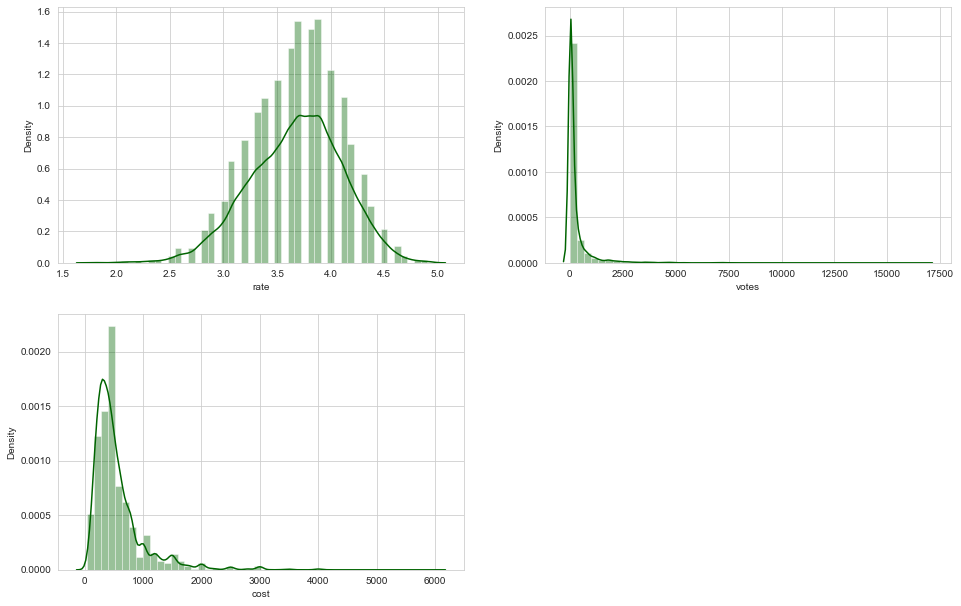

In [123]:
data_columns = rest._get_numeric_data().columns.values
plot_columns = 2
number_of_columns = math.ceil(len(data_columns)/plot_columns)
number_of_rows = math.ceil((len(data_columns))/number_of_columns)

plt.figure(figsize=(16,16))

# plot distribution
for i in range(0, len(data_columns)):
    plt.subplot(number_of_columns + 1, number_of_rows, i+1)
    sns.distplot(rest[data_columns[i]], kde=True, color="Darkgreen") 


In [124]:
rest.describe()

rate         votes          cost
count  24006.000000  24006.000000  24006.000000
mean       3.679268    284.265892    558.486462
std        0.427033    739.097851    454.789192
min        1.800000      0.000000     40.000000
25%        3.400000     18.000000    300.000000
50%        3.700000     61.000000    400.000000
75%        4.000000    224.000000    650.000000
max        4.900000  16832.000000   6000.000000

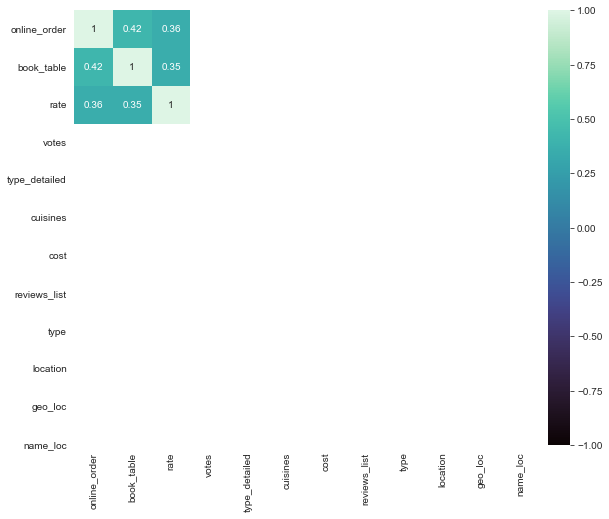

In [125]:
#correlation of numerical variables
plt.figure(figsize=(10,8))
sns.heatmap(rest.corr(),
           xticklabels = rest.columns.values,
           yticklabels = rest.columns.values,
           annot = True, vmax=1, vmin=-1, center=0,  cmap = 'mako')

plt.show()


In [126]:
rest.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'type_detailed',
       'cuisines', 'cost', 'reviews_list', 'type', 'location', 'geo_loc',
       'name_loc'],
      dtype='object')

## Rating

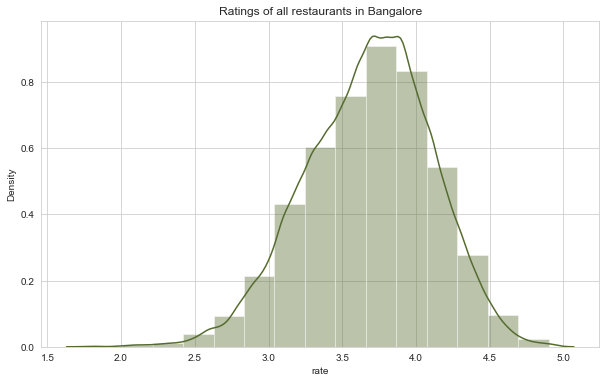

In [127]:
plt.figure(figsize=(10,6))
sns.distplot(rest["rate"], kde=True, color="darkolivegreen", bins=15) 
plt.title('Ratings of all restaurants in Bangalore')
plt.show()

## Online orders

In [128]:
rest["online_order"].value_counts(normalize=True)

Yes    0.663542
No     0.336458
Name: online_order, dtype: float64

## Book tables

In [129]:
rest["book_table"].value_counts(normalize=True)

No     0.880946
Yes    0.119054
Name: book_table, dtype: float64

## Votes

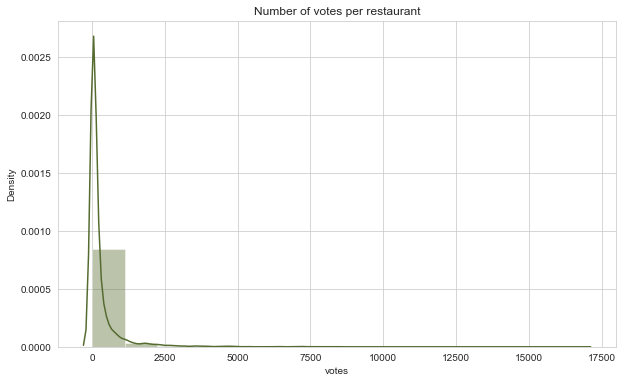

In [130]:
plt.figure(figsize=(10,6))
sns.distplot(rest["votes"], kde=True, color="darkolivegreen", bins=15) 
plt.title('Number of votes per restaurant')
plt.show()

## Type

In [132]:
bar1 = go.Bar(x=rest["type"].value_counts().index, y=rest["type"].value_counts(), 
             marker={'color': "darkolivegreen"})
layout = go.Layout(title = "Types of restaurants available in Bangalore")
fig = go.Figure(data=bar1, layout=layout)
py.iplot(fig, filename="basic-bar")

In [133]:
bar2 = go.Bar(x=rest["type_detailed"].value_counts().index, y=rest["type_detailed"].value_counts(), 
             marker={'color': "darkolivegreen"})
fig = go.Figure(data=bar2)
py.iplot(fig, filename="basic-bar")

## Cost

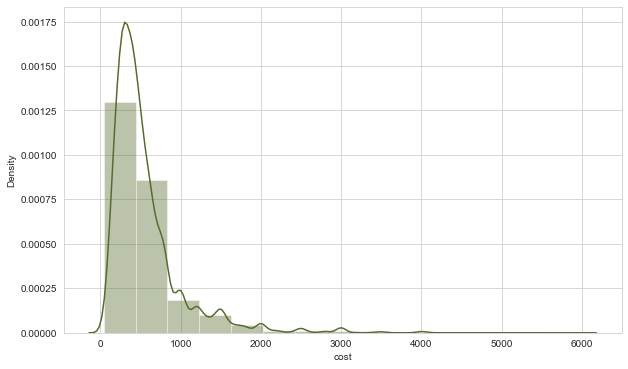

In [134]:
plt.figure(figsize=(10,6))
sns.distplot(rest["cost"], kde=True, color="darkolivegreen", bins=15) 
plt.show()

## Cuisines

In [135]:
bar = go.Bar(x=rest["cuisines"].value_counts().index, y=rest["cuisines"].value_counts(), 
             marker={'color': "darkolivegreen"})
layout = go.Layout(title = "Available cuisines in Bangalore")
fig = go.Figure(data=bar, layout=layout)
py.iplot(fig, filename="basic-bar")

In [136]:
rest["cuisines2"] = rest["cuisines"].str.replace(",", "")

In [137]:
rest["cuisines2"]

8756                                    Desserts
24674                   Asian Chinese Thai Momos
32760                                   Desserts
22097                   Asian Chinese Thai Momos
14251    European Mediterranean North Indian BBQ
                          ...                   
37689           North Indian Continental Chinese
5114            North Indian Continental Chinese
33683           North Indian Continental Chinese
29892           North Indian Continental Chinese
8885            North Indian Continental Chinese
Name: cuisines2, Length: 24006, dtype: object

In [138]:
rest["cuisines2"] = rest["cuisines2"].str.replace("North Indian", "North_Indian")
rest["cuisines2"] = rest["cuisines2"].str.replace("South Indian", "South_Indian")
rest["cuisines2"] = rest["cuisines2"].str.replace("Ice Cream", "Ice_cream")
rest["cuisines2"] = rest["cuisines2"].str.replace("Food", "")

In [139]:
rest["cuisines2"]

8756                                    Desserts
24674                   Asian Chinese Thai Momos
32760                                   Desserts
22097                   Asian Chinese Thai Momos
14251    European Mediterranean North_Indian BBQ
                          ...                   
37689           North_Indian Continental Chinese
5114            North_Indian Continental Chinese
33683           North_Indian Continental Chinese
29892           North_Indian Continental Chinese
8885            North_Indian Continental Chinese
Name: cuisines2, Length: 24006, dtype: object

In [140]:
rest["cuisines2"].value_counts()

North_Indian                                                       1314
North_Indian Chinese                                               1164
South_Indian                                                        887
Biryani                                                             408
South_Indian North_Indian Chinese                                   369
                                                                   ... 
Street  American Sandwich Fast  Beverages Burger Desserts Pizza       1
Chinese Vietnamese Thai Malaysian                                     1
North_Indian Chinese Mughlai Rolls                                    1
Arabian BBQ Rolls Chinese                                             1
Fast  Street  North_Indian Biryani                                    1
Name: cuisines2, Length: 2338, dtype: int64

In [141]:
allcuisines = rest['cuisines2'].str.split(expand=True).unstack().value_counts()

In [142]:
allcuisines[:20]

North_Indian    10015
Chinese          7506
South_Indian     4012
Fast             3769
Biryani          3129
Continental      2438
Desserts         2376
Beverages        2286
Cafe             1925
Italian          1522
Street           1373
Bakery           1066
Pizza             951
Seafood           949
Burger            911
Andhra            860
Ice_cream         841
Mughlai           805
Rolls             744
Kerala            712
dtype: int64

In [143]:
bar = [go.Bar(x = allcuisines.index.values[:20], y = allcuisines.values[:20],
            marker= dict(colorscale='fall', color = allcuisines.values),
            text='Cuisine counts')]

layout = go.Layout(title='Most common cuisines in Bangalore')

fig = go.Figure(data=bar, layout=layout)

py.iplot(fig, filename='basic-bar')

## Location

In [144]:
bar1 = go.Bar(x=rest["location"].value_counts().index[:20], y=rest["location"].value_counts()[:20], 
             marker={'color': "darkolivegreen"})
layout = go.Layout(title='Most popular locations for restaurants in Bangalore')
fig = go.Figure(data=bar1, layout=layout)
py.iplot(fig, filename="basic-bar")

# Reviews - general feeling

## Text cleaning

In [167]:
zomato.head()

name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

         type_detailed                        cuisines  cost  \
0        Casual Dining  North Indian, Mughlai, Chinese   800   
1        Casual Dining     Chinese, North Indian, Thai   800   
2  Cafe, Casual Dining          Cafe, Mexican, Italian   800   
3          Quick Bites      South Indian, North Indian   300   
4        Casual Dining        North Indian, Rajasthani   600   

                                        reviews_list    type      location  
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...  Buffet  Banashankari  
1  [('Rated 4.0', 'RATED\n  Had been here for din...  Buffet  Banashankari  
2  [('Rated 3.0', "RATED\n  Ambience is not that ...  Buffet  Banashankari  
3  [('Rated 4.0', "RATED\n  Great food and proper...  Buffet  Banashankari  
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...  Buffet  Banashankari

In [168]:
zomato.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'type_detailed',
       'cuisines', 'cost', 'reviews_list', 'type', 'location'],
      dtype='object')

In [169]:
zomato.isna().sum()

name               0
online_order       0
book_table         0
rate               0
votes              0
type_detailed    147
cuisines           0
cost               0
reviews_list       0
type               0
location           0
dtype: int64

In [253]:
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,
    remove links,remove punctuation
    and remove words containing numbers.'''
    
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', '', text) #remove urls, https
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text) #get rid of digits, ie numbers
    return text

In [171]:
zomato["rev_clean"] = zomato["reviews_list"].apply(lambda x: clean_text(x))

In [172]:
zomato["rev_clean"]

0        rated  ratedn  a beautiful place to dine inthe...
1        rated  ratedn  had been here for dinner with f...
2        rated  ratedn  ambience is not that good enoug...
3        rated  ratedn  great food and proper karnataka...
4        rated  ratedn  very good restaurant in neighbo...
                               ...                        
51709    rated  ratedn  ambience big and spacious lawn ...
51711    rated  ratedn  a fine place to chill after off...
51712    rated  ratedn  food and service are incomparab...
51715    rated  ratedn  nice and friendly place and sta...
51716    rated  ratedn  great ambience  looking nice go...
Name: rev_clean, Length: 41410, dtype: object

In [173]:
zomato["rev_clean"] = zomato["rev_clean"].str.replace("rated ", "")
zomato["rev_clean"] = zomato["rev_clean"].str.replace("ratedn ", "")


In [174]:
zomato["rev_clean"].head()

0      a beautiful place to dine inthe interiors ta...
1      had been here for dinner with family turned ...
2      ambience is not that good enough and its not...
3      great food and proper karnataka style full m...
4      very good restaurant in neighbourhood buffet...
Name: rev_clean, dtype: object

In [254]:
def clean_tokens(text,language):
    # create tokens
    tokens = word_tokenize(text)
    # remove stop_words
    stop_words = set(stopwords.words(language))
    words = [w for w in tokens if not w in stop_words]
    # 4. Join the information
    combined_text = ' '.join(words)
    # return 
    return combined_text

In [176]:
zomato["rev_clean"] = zomato["rev_clean"].apply(lambda x: clean_tokens(x, "english"))

In [177]:
zomato["rev_clean"].head()

0    beautiful place dine inthe interiors take back...
1    dinner family turned good choose suitable ages...
2    ambience good enough pocket friendly cafe quan...
3    great food proper karnataka style full meals t...
4    good restaurant neighbourhood buffet system pr...
Name: rev_clean, dtype: object

## Wordcloud

(-0.5, 2999.5, 1999.5, -0.5)

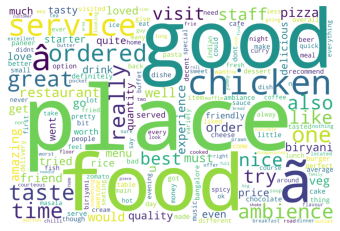

In [178]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",
                      width= 3000, height = 2000,collocations=False,
                      stopwords = stopwords.words('english'))

wordcloud.generate(' '.join(zomato["rev_clean"]))

plt.imshow(wordcloud)
plt.axis("off")

In [235]:
zomato["rev_clean"].unique()

array(['beautiful place dine inthe interiors take back mughal era lightings perfectwe went occasion christmas limited items available taste service compromised allthe complaint breads could betterwould surely like come dinner family weekday restaurant completely empty ambience good good old hindi music seating arrangement good ordered masala papad panner baby corn starters lemon corrionder soup butter roti olive chilli paratha food fresh good service good good family hangoutncheers restaurant near banashankari bda along office friends visited buffet unfortunately provide veg buffet inquiring said place mostly visited vegetarians anyways ordered ala carte items took ages come food ok ok definitely visiting anymore went weekend one us buffet two us took ala carte firstly ambience service place great buffet lot items good good pumpkin halwa intm dessert amazing must try kulchas great cheers best thing place itã\x83\x82\x83\x82\x83\x82\x83\x82 ambiance second best thing yummy food try buff

In [236]:
zomato["rev_clean"] = zomato["rev_clean"].str.replace("ã", "")
zomato["rev_clean"] = zomato["rev_clean"].str.replace("â", "")

(-0.5, 399.5, 199.5, -0.5)

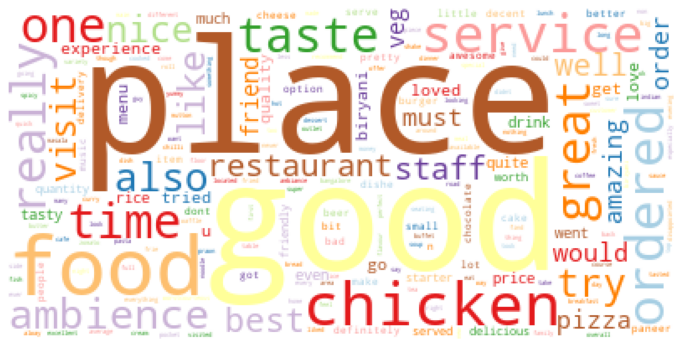

In [242]:
from wordcloud import WordCloud

plt.figure(figsize=(12,9))
wordcloud = WordCloud(background_color="white",collocations=False,
                      stopwords = stopwords.words('english'),
                     colormap="Paired_r")

wordcloud.generate(' '.join(zomato["rev_clean"]))

plt.imshow(wordcloud)
plt.axis("off")

# Best rated on Zomato

In [145]:
newtop20 = rest[:20]

In [146]:
newtop20.head()

online_order book_table  rate  votes       type_detailed  \
8756           Yes         No   4.9   1744      Dessert Parlor   
24674          Yes        Yes   4.9   2244  Casual Dining, Bar   
32760          Yes         No   4.9   1750      Dessert Parlor   
22097          Yes        Yes   4.9   2235  Casual Dining, Bar   
14251           No        Yes   4.9   6404       Casual Dining   

                                         cuisines  cost  \
8756                                     Desserts   400   
24674                 Asian, Chinese, Thai, Momos  1500   
32760                                    Desserts   400   
22097                 Asian, Chinese, Thai, Momos  1500   
14251  European, Mediterranean, North Indian, BBQ  1600   

                                            reviews_list      type  \
8756   [('Rated 3.0', "RATED\n  Waffles are totally w...  Desserts   
24674  [('Rated 3.0', 'RATED\n  Hmm not great not bad...  Delivery   
32760  [('Rated 4.0', "RATED\n  Looks like there's a ...  Delivery   
22097  [('Rated 5.0', 'RATED\n  This was my 2nd visit...    Buffet   
14251  [('Rated 5.0', "RATED\n  Best place for buffet...    Buffet   

                    location                   geo_loc  \
8756           Church Street  (12.9742939, 77.6525189)   
24674  Koramangala 6th Block  (13.2923988, 77.7519261)   
32760                MG Road  (12.9741854, 77.6124135)   
22097  Koramangala 5th Block  (13.2923988, 77.7519261)   
14251              Jayanagar  (12.9292731, 77.5824229)   

                                                name_loc  \
8756               Belgian Waffle Factory- Church Street   
24674  Asia Kitchen By Mainland China- Koramangala 6t...   
32760                    Belgian Waffle Factory- MG Road   
22097  Asia Kitchen By Mainland China- Koramangala 5t...   
14251               AB's - Absolute Barbecues- Jayanagar   

                                     cuisines2  
8756                                  Desserts  
24674                 Asian Chinese Thai Momos  
32760                                 Desserts  
22097                 Asian Chinese Thai Momos  
14251  European Mediterranean North_Indian BBQ

In [147]:
bar = go.Bar(x=newtop20["name_loc"], y=newtop20["rate"], marker={'color': "darkolivegreen"})
layout = go.Layout(title = "Top 20 best restaurants in Bangalore")
fig = go.Figure(data=bar, layout=layout)
py.iplot(fig, filename="basic-bar")

In [148]:
print(newtop20.rate.max())
print(newtop20.rate.min())

4.9
4.9


In [149]:
# looks like all the top 20 restaurants have rating of 4.9 and loads belong to the same chains

In [150]:
unique(newtop20)

online_order has these unique values:  ['Yes' 'No']
book_table has these unique values:  ['No' 'Yes']
rate has these unique values:  [4.9]
votes has these unique values:  [ 1744  2244  1750  2235  6404  2217  2254  2202  3004   246  1749  2184
  6375 16832  1746 16345  1940  6490  1743]
type_detailed has these unique values:  ['Dessert Parlor' 'Casual Dining, Bar' 'Casual Dining' 'Microbrewery']
cuisines has these unique values:  ['Desserts' 'Asian, Chinese, Thai, Momos'
 'European, Mediterranean, North Indian, BBQ'
 'Asian, Mediterranean, North Indian, BBQ'
 'Healthy Food, Salad, Mediterranean'
 'Continental, North Indian, Italian, South Indian, Finger Food'
 'North Indian, Mughlai']
cost has these unique values:  [ 400 1500 1600 1400 1000 2000]
reviews_list has these unique values:  ['[(\'Rated 3.0\', "RATED\\n  Waffles are totally worth it, really loved the red velvet cheese waffle, it was too creamy. Also, I\'ll recommend \'The sin\' waffle.\\nStaff is really cool and friendly. Amb

In [151]:
rest.name_loc.nunique()

24006

In [152]:
#let's look at the top 200
top200 = rest[:200]

In [153]:
top200.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'type_detailed',
       'cuisines', 'cost', 'reviews_list', 'type', 'location', 'geo_loc',
       'name_loc', 'cuisines2'],
      dtype='object')

## Online orders

In [154]:
newtop20["online_order"].value_counts(normalize=True)

Yes    0.75
No     0.25
Name: online_order, dtype: float64

In [156]:
bar = go.Bar(x=newtop20["online_order"].value_counts().index, y=newtop20["online_order"].value_counts(), 
             marker={'color': "darkolivegreen"})
layout = go.Layout(title = "Top 20 restaurants in Bangalore - do they allow ordering online?")
fig = go.Figure(data=bar, layout=layout)
py.iplot(fig, filename="basic-bar")

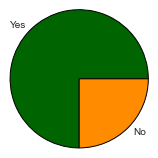

In [157]:
fig = plt.figure()

labels = "Yes", "No"

ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(newtop20["online_order"].value_counts(),
        labels=labels,
        radius=1.2,
        colors=["Darkgreen", "Darkorange"],
        wedgeprops={
            "edgecolor": "k",
            'linewidth': 1,
            'linestyle': 'solid',
            'antialiased': True
        })
plt.show()

In [158]:
top200["online_order"].value_counts(normalize=True)

No     0.585
Yes    0.415
Name: online_order, dtype: float64

In [159]:
bar = go.Bar(x=top200["online_order"].value_counts().index, y=top200["online_order"].value_counts(), 
             marker={'color': "Darkgreen"})
layout = go.Layout(title = "Top 200 restaurants in Bangalore - do they allow ordering online?")
fig = go.Figure(data=bar, layout=layout)
py.iplot(fig, filename="basic-bar")

## Book tables

In [160]:
newtop20["book_table"].value_counts(normalize=True)

Yes    0.7
No     0.3
Name: book_table, dtype: float64

In [162]:
bar = go.Bar(x=newtop20["book_table"].value_counts().index, y=newtop20["book_table"].value_counts(), 
             marker={'color': "darkolivegreen"})
layout = go.Layout(title = "Top 20 best restaurants in Bangalore - do they allow booking a table ?")
fig = go.Figure(data=bar, layout=layout)
py.iplot(fig, filename="basic-bar")

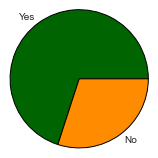

In [163]:
fig = plt.figure()

labels = "Yes", "No"

ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(newtop20["book_table"].value_counts(),
        labels=labels,
        radius=1.2,
        colors=["Darkgreen", "Darkorange"],
        wedgeprops={
            "edgecolor": "k",
            'linewidth': 1,
            'linestyle': 'solid',
            'antialiased': True
        })
plt.show()

In [164]:
top200["book_table"].value_counts(normalize=True)

Yes    0.57
No     0.43
Name: book_table, dtype: float64

In [166]:
bar = go.Bar(x=top200["book_table"].value_counts().index, y=top200["book_table"].value_counts(), 
             marker={'color': "darkolivegreen"})
layout = go.Layout(title = "Top 200 best restaurants in Bangalore - do they allow booking a table ?")
fig = go.Figure(data=bar, layout=layout)
py.iplot(fig, filename="basic-bar")

## Type

In [169]:
bar = go.Bar(x=newtop20["type"].value_counts().index, y=newtop20["type"].value_counts(), 
             marker={'color': "darkolivegreen"})
layout = go.Layout(title = "What type are the top 20 best restaurants in Bangalore?")
fig = go.Figure(data=bar, layout=layout)
py.iplot(fig, filename="basic-bar")

In [170]:
bar = go.Bar(x=top200["type"].value_counts().index, y=top200["type"].value_counts(), 
             marker={'color': "darkolivegreen"})
layout = go.Layout(title = "What type are the top 200 best restaurants in Bangalore?")
fig = go.Figure(data=bar, layout=layout)
py.iplot(fig, filename="basic-bar")

In [171]:
bar = go.Bar(x=newtop20["type_detailed"].value_counts().index, y=newtop20["type_detailed"].value_counts(), 
             marker={'color': "darkolivegreen"})
layout = go.Layout(title = "What type are the top 20 best restaurants in Bangalore?")
fig = go.Figure(data=bar, layout=layout)
py.iplot(fig, filename="basic-bar")

In [172]:
bar = go.Bar(x=top200["type_detailed"].value_counts().index, y=top200["type_detailed"].value_counts(), 
             marker={'color': "darkolivegreen"})
layout = go.Layout(title = "What type are the top 200 best restaurants in Bangalore?")
fig = go.Figure(data=bar, layout=layout)
py.iplot(fig, filename="basic-bar")

## Cuisine

In [173]:
bar = go.Bar(x=newtop20["cuisines"].value_counts().index, y=newtop20["cuisines"].value_counts(), 
             marker={'color': "darkolivegreen"})
layout = go.Layout(title = "What type of food are the top 20 best restaurants in Bangalore?")
fig = go.Figure(data=bar, layout=layout)
py.iplot(fig, filename="basic-bar")

In [174]:
newtop20["cuisines"] = newtop20["cuisines"].str.replace(",", "")

In [175]:
newtop20["cuisines"]

8756                                              Desserts
24674                             Asian Chinese Thai Momos
32760                                             Desserts
22097                             Asian Chinese Thai Momos
14251              European Mediterranean North Indian BBQ
20708                             Asian Chinese Thai Momos
28077                             Asian Chinese Thai Momos
15099                             Asian Chinese Thai Momos
39731                 Asian Mediterranean North Indian BBQ
35543                     Healthy Food Salad Mediterranean
37327                                             Desserts
8030                              Asian Chinese Thai Momos
5464               European Mediterranean North Indian BBQ
29020                                             Desserts
38668    Continental North Indian Italian South Indian ...
4150                                              Desserts
3954     Continental North Indian Italian South Indian .

In [176]:
newtop20["cuisines"] = newtop20["cuisines"].str.replace("North Indian", "North_Indian")
newtop20["cuisines"] = newtop20["cuisines"].str.replace("South Indian", "South_Indian")

In [177]:
newtop20["cuisines"]

8756                                              Desserts
24674                             Asian Chinese Thai Momos
32760                                             Desserts
22097                             Asian Chinese Thai Momos
14251              European Mediterranean North_Indian BBQ
20708                             Asian Chinese Thai Momos
28077                             Asian Chinese Thai Momos
15099                             Asian Chinese Thai Momos
39731                 Asian Mediterranean North_Indian BBQ
35543                     Healthy Food Salad Mediterranean
37327                                             Desserts
8030                              Asian Chinese Thai Momos
5464               European Mediterranean North_Indian BBQ
29020                                             Desserts
38668    Continental North_Indian Italian South_Indian ...
4150                                              Desserts
3954     Continental North_Indian Italian South_Indian .

In [178]:
cuisines = newtop20['cuisines'].str.split(expand=True).unstack().value_counts()

In [179]:
bar = [go.Bar(x = cuisines.index.values, y = cuisines.values,
            marker= dict(colorscale='fall', color = cuisines.values),
            text='Cuisine counts')]

layout = go.Layout(title='Cuisines served on the top 20 restaurants in Bangalore')

fig = go.Figure(data=bar, layout=layout)

py.iplot(fig, filename='basic-bar')

In [209]:
# what about top 200?

In [ ]:
bar = go.Bar(x=top200["cuisines"].value_counts().index, y=top200["cuisines"].value_counts(),
            marker= dict(colorscale='fall', color = cuisines.values))
layout = go.Layout(title = "What type of food are the top 200 best restaurants in Bangalore?")
fig = go.Figure(data=bar, layout=layout)
py.iplot(fig, filename="basic-bar")

In [181]:
top200["cuisines"] = top200["cuisines"].str.replace(",", "")

In [182]:
top200["cuisines"]

8756                                         Desserts
24674                        Asian Chinese Thai Momos
32760                                        Desserts
22097                        Asian Chinese Thai Momos
14251         European Mediterranean North Indian BBQ
                             ...                     
6851                                   Cafe Beverages
17261       North Indian South Indian Chinese Seafood
12277    Chinese Continental North Indian Finger Food
23685                            Cafe American Burger
23383                              Desserts Beverages
Name: cuisines, Length: 200, dtype: object

In [183]:
top200["cuisines"] = top200["cuisines"].str.replace("North Indian", "North_Indian")
top200["cuisines"] = top200["cuisines"].str.replace("South Indian", "South_Indian")

In [184]:
top200["cuisines"]

8756                                         Desserts
24674                        Asian Chinese Thai Momos
32760                                        Desserts
22097                        Asian Chinese Thai Momos
14251         European Mediterranean North_Indian BBQ
                             ...                     
6851                                   Cafe Beverages
17261       North_Indian South_Indian Chinese Seafood
12277    Chinese Continental North_Indian Finger Food
23685                            Cafe American Burger
23383                              Desserts Beverages
Name: cuisines, Length: 200, dtype: object

In [185]:
cuisines = top200['cuisines'].str.split(expand=True).unstack().value_counts()

In [186]:
bar = [go.Bar(x = cuisines.index.values, y = cuisines.values,
            marker= dict(colorscale='fall', color = cuisines.values),
            text='Cuisine counts')]

layout = go.Layout(title='Cuisines served on the top 200 restaurants in Bangalore')

fig = go.Figure(data=bar, layout=layout)

py.iplot(fig, filename='basic-bar')

(-0.5, 399.5, 199.5, -0.5)

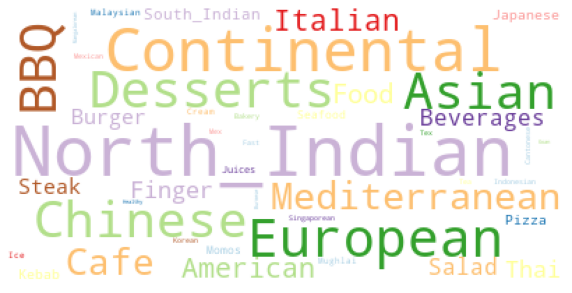

In [189]:
from wordcloud import WordCloud

plt.figure(figsize=(10,6))
wordcloud = WordCloud(background_color="white",collocations=False,
                      stopwords = stopwords.words('english'),
                     colormap="Paired_r")

wordcloud.generate(' '.join(top200['cuisines']))

plt.imshow(wordcloud)
plt.axis("off")

In [217]:
top200.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'type_detailed',
       'cuisines', 'cost', 'reviews_list', 'type', 'location', 'geo_loc',
       'name_loc', 'cuisines2'],
      dtype='object')

## Cost

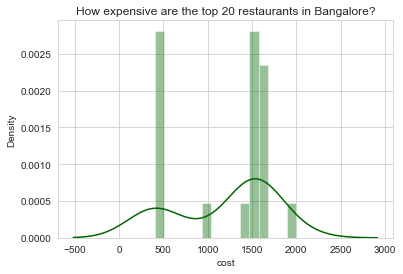

In [187]:
sns.distplot(newtop20["cost"], kde=True, color="Darkgreen", bins=15) 
plt.title('How expensive are the top 20 restaurants in Bangalore?')
plt.show()


In [188]:
# can see two spikes, probably two types of restaurants

In [190]:
newtop20["cost"].unique()

array([ 400, 1500, 1600, 1400, 1000, 2000])

In [191]:
pricebycuisine = newtop20.groupby("cuisines")["cost"].mean()
pricebycuisine

cuisines
Asian Chinese Thai Momos                                     1500.0
Asian Mediterranean North_Indian BBQ                         1400.0
Continental North_Indian Italian South_Indian Finger Food    1600.0
Desserts                                                      400.0
European Mediterranean North_Indian BBQ                      1600.0
Healthy Food Salad Mediterranean                             1000.0
North_Indian Mughlai                                         2000.0
Name: cost, dtype: float64

In [192]:
bar = [go.Bar(x = pricebycuisine.index.values, y = pricebycuisine.values,
            marker= dict(colorscale='fall', color = pricebycuisine.values),
            text='Cuisine')]

layout = go.Layout(title='Average price by cuisine for  the top 20 restaurants in Bangalore')

fig = go.Figure(data=bar, layout=layout)

py.iplot(fig, filename='basic-bar')


In [223]:
# what about op 200?

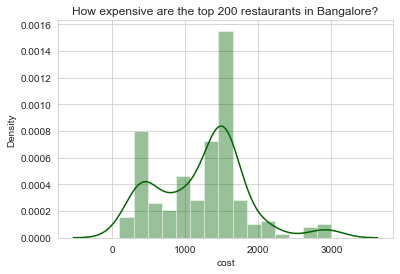

In [193]:
sns.distplot(top200["cost"], kde=True, color="Darkgreen", bins=15) 
plt.title('How expensive are the top 200 restaurants in Bangalore?')
plt.show()


In [225]:
# we no longer have two spikes, 1500 is the most common

In [194]:
pricebycuisine = top200.groupby("cuisines")["cost"].mean()
pricebycuisine

cuisines
American Continental North_Indian Mediterranean    1800.0
American North_Indian Chinese Finger Food          1500.0
American Tex-Mex Burger BBQ                        1800.0
American Tex-Mex Burger BBQ Mexican                1400.0
Asian Burmese                                      1500.0
                                                    ...  
Salad Italian Desserts Pizza                       1500.0
South_Indian                                        125.0
Spanish Italian Mediterranean European Salad       2200.0
Sushi Japanese Chinese Thai                        2000.0
Thai                                               3000.0
Name: cost, Length: 71, dtype: float64

In [195]:
bar = [go.Bar(x = pricebycuisine.index.values, y = pricebycuisine.values,
            marker= dict(colorscale='fall', color = pricebycuisine.values),
            text='Cuisine')]

layout = go.Layout(title='Average price by cuisine for  the top 200 restaurants in Bangalore')

fig = go.Figure(data=bar, layout=layout)

py.iplot(fig, filename='basic-bar')


In [196]:
top200.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'type_detailed',
       'cuisines', 'cost', 'reviews_list', 'type', 'location', 'geo_loc',
       'name_loc', 'cuisines2'],
      dtype='object')

## Location

In [198]:
bar = go.Bar(x=top200["location"].value_counts().index, y=top200["location"].value_counts(), 
             marker={'color': "darkolivegreen"})
layout = go.Layout(title = "Where are the best restaurants in Bangalore?")
fig = go.Figure(data=bar, layout=layout)
py.iplot(fig, filename="basic-bar")

In [199]:
top200.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'type_detailed',
       'cuisines', 'cost', 'reviews_list', 'type', 'location', 'geo_loc',
       'name_loc', 'cuisines2'],
      dtype='object')

In [200]:
cuisine_loc = top200.groupby(["location","cuisines"]).count()["rate"].reset_index()
cuisine_loc.rename({'rate': 'count'}, axis=1,inplace=True)
cuisine_loc.head()

location                                   cuisines  count
0      BTM  American North_Indian Chinese Finger Food      1
1      BTM                   Asian Chinese Thai Momos      1
2      BTM                 Cafe American Burger Steak      1
3      BTM                             Cafe Beverages      1
4      BTM                  Cafe Desserts Continental      1

In [201]:
fig = px.bar(cuisine_loc, x = "location", y = "count", color = "cuisines")
fig.show()


In [233]:
top200["location"].value_counts()[:5]

Koramangala 4th Block    18
Koramangala 5th Block    17
Indiranagar              15
BTM                      15
Koramangala 6th Block    14
Name: location, dtype: int64

In [202]:
cuisine_loc2 = newtop20.groupby(["location","cuisines"]).mean()["rate"].reset_index()
cuisine_loc2 

location                                           cuisines  \
0                     BTM                           Asian Chinese Thai Momos   
1                     BTM            European Mediterranean North_Indian BBQ   
2               Bellandur  Continental North_Indian Italian South_Indian ...   
3            Brigade Road                                           Desserts   
4           Church Street                                           Desserts   
5             Frazer Town                                           Desserts   
6               Jayanagar                           Asian Chinese Thai Momos   
7               Jayanagar            European Mediterranean North_Indian BBQ   
8   Koramangala 4th Block                           Asian Chinese Thai Momos   
9   Koramangala 5th Block                           Asian Chinese Thai Momos   
10  Koramangala 6th Block                           Asian Chinese Thai Momos   
11  Koramangala 7th Block                           Asian Chinese Thai Momos   
12  Koramangala 7th Block            European Mediterranean North_Indian BBQ   
13           Lavelle Road                                           Desserts   
14                MG Road                                           Desserts   
15           Malleshwaram                               North_Indian Mughlai   
16       Old Airport Road                   Healthy Food Salad Mediterranean   
17         Residency Road                                           Desserts   
18          Sarjapur Road  Continental North_Indian Italian South_Indian ...   
19             Whitefield               Asian Mediterranean North_Indian BBQ   

    rate  
0    4.9  
1    4.9  
2    4.9  
3    4.9  
4    4.9  
5    4.9  
6    4.9  
7    4.9  
8    4.9  
9    4.9  
10   4.9  
11   4.9  
12   4.9  
13   4.9  
14   4.9  
15   4.9  
16   4.9  
17   4.9  
18   4.9  
19   4.9

## Reviews

In [243]:
newtop20.head()

online_order book_table  rate  votes       type_detailed  \
8756           Yes         No   4.9   1744      Dessert Parlor   
24674          Yes        Yes   4.9   2244  Casual Dining, Bar   
32760          Yes         No   4.9   1750      Dessert Parlor   
22097          Yes        Yes   4.9   2235  Casual Dining, Bar   
14251           No        Yes   4.9   6404       Casual Dining   

                                      cuisines  cost  \
8756                                  Desserts   400   
24674                 Asian Chinese Thai Momos  1500   
32760                                 Desserts   400   
22097                 Asian Chinese Thai Momos  1500   
14251  European Mediterranean North_Indian BBQ  1600   

                                            reviews_list      type  \
8756   [('Rated 3.0', "RATED\n  Waffles are totally w...  Desserts   
24674  [('Rated 3.0', 'RATED\n  Hmm not great not bad...  Delivery   
32760  [('Rated 4.0', "RATED\n  Looks like there's a ...  Delivery   
22097  [('Rated 5.0', 'RATED\n  This was my 2nd visit...    Buffet   
14251  [('Rated 5.0', "RATED\n  Best place for buffet...    Buffet   

                    location                   geo_loc  \
8756           Church Street  (12.9742939, 77.6525189)   
24674  Koramangala 6th Block  (13.2923988, 77.7519261)   
32760                MG Road  (12.9741854, 77.6124135)   
22097  Koramangala 5th Block  (13.2923988, 77.7519261)   
14251              Jayanagar  (12.9292731, 77.5824229)   

                                                name_loc  \
8756               Belgian Waffle Factory- Church Street   
24674  Asia Kitchen By Mainland China- Koramangala 6t...   
32760                    Belgian Waffle Factory- MG Road   
22097  Asia Kitchen By Mainland China- Koramangala 5t...   
14251               AB's - Absolute Barbecues- Jayanagar   

                                     cuisines2  
8756                                  Desserts  
24674                 Asian Chinese Thai Momos  
32760                                 Desserts  
22097                 Asian Chinese Thai Momos  
14251  European Mediterranean North_Indian BBQ

In [255]:
newtop20["rev_clean"] = newtop20["reviews_list"].apply(lambda x: clean_text(x))

In [256]:
newtop20["rev_clean"]

8756     rated  ratedn  waffles are totally worth it re...
24674    rated  ratedn  hmm not great not bad buffet ha...
32760    rated  ratedn  looks like theres a scam going ...
22097    rated  ratedn  this was my  visit previously i...
14251    rated  ratedn  best place for buffet was wonde...
20708    rated  ratedn  everything from the appetizers ...
28077    rated  ratedn  order the dim sum and khau suey...
15099    rated  ratedn  everything from the appetizers ...
39731    rated  ratedn  last week i had a team launch a...
35543    rated  ratedn  i visited this lovely place rec...
37327    rated  ratedn  looks like theres a scam going ...
8030     rated  ratedn  this is not just one of the chi...
5464     rated  ratedn  we liked the place a lot and fo...
29020    rated  ratedn  looks like theres a scam going ...
38668    rated  ratedn  visiting a microbrewery after a...
4150     rated  ratedn  waffles are totally worth it re...
3954     rated  ratedn  i have been to this place a lot.

In [257]:
newtop20["rev_clean"] = newtop20["rev_clean"].str.replace("rated ", "")
newtop20["rev_clean"] = newtop20["rev_clean"].str.replace("ratedn ", "")

In [258]:
newtop20["rev_clean"] = newtop20["rev_clean"].apply(lambda x: clean_tokens(x, "english"))

In [262]:
newtop20["rev_clean"] = newtop20["rev_clean"].str.replace("ã", "")
newtop20["rev_clean"] = newtop20["rev_clean"].str.replace("â", "")
newtop20["rev_clean"] = newtop20["rev_clean"].str.replace("u", "")

(-0.5, 399.5, 199.5, -0.5)

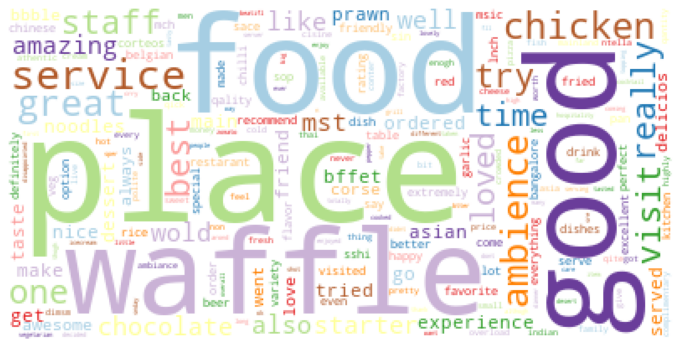

In [264]:
plt.figure(figsize=(12,9))
wordcloud = WordCloud(background_color="white",collocations=False,
                      stopwords = stopwords.words('english'),
                     colormap="Paired_r")

wordcloud.generate(' '.join(newtop20["rev_clean"]))

plt.imshow(wordcloud)
plt.axis("off")

# Desserts deep dive

In [262]:
zomato.head()

name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

         type_detailed                        cuisines  cost  \
0        Casual Dining  North Indian, Mughlai, Chinese   800   
1        Casual Dining     Chinese, North Indian, Thai   800   
2  Cafe, Casual Dining          Cafe, Mexican, Italian   800   
3          Quick Bites      South Indian, North Indian   300   
4        Casual Dining        North Indian, Rajasthani   600   

                                        reviews_list    type      location  
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...  Buffet  Banashankari  
1  [('Rated 4.0', 'RATED\n  Had been here for din...  Buffet  Banashankari  
2  [('Rated 3.0', "RATED\n  Ambience is not that ...  Buffet  Banashankari  
3  [('Rated 4.0', "RATED\n  Great food and proper...  Buffet  Banashankari  
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...  Buffet  Banashankari

In [263]:
zomato[zomato["cuisines"].str.contains("Desserts")]

name online_order book_table  rate  votes  \
32                      Sweet Truth          Yes         No   3.9     35   
52           Corner House Ice Cream           No         No   4.3    345   
59                XO Belgian Waffle          Yes         No   3.7     17   
68                       Sugar Rush           No         No   3.8     39   
81                    Frozen Bottle          Yes         No   4.2    146   
...                             ...          ...        ...   ...    ...   
51399                  Chef Baker's          Yes         No   3.8    124   
51406                       eat.fit           No         No   3.6     10   
51427                   Hodge Podge          Yes         No   3.6     10   
51613                  Lassi Xpress           No         No   3.4      7   
51621  The Deli - The Den Bengaluru          Yes         No   3.7     24   

           type_detailed                                           cuisines  \
32              Delivery                                   Bakery, Desserts   
52        Dessert Parlor                                Ice Cream, Desserts   
59        Dessert Parlor                                Desserts, Beverages   
68                Bakery                                   Bakery, Desserts   
81         Beverage Shop                     Beverages, Desserts, Ice Cream   
...                  ...                                                ...   
51399       Bakery, Cafe             Bakery, Desserts, Cafe, Italian, Pizza   
51406        Quick Bites  Healthy Food, North Indian, Biryani, Continent...   
51427  Quick Bites, Cafe                                     Desserts, Cafe   
51613      Beverage Shop                      Beverages, Sandwich, Desserts   
51621             Bakery                                   Bakery, Desserts   

       cost                                       reviews_list      type  \
32      500  [('Rated 4.0', 'RATED\n  I had the opportunity...  Delivery   
52      400  [('Rated 3.0', "RATED\n  Always a fan of corne...  Delivery   
59      400  [('Rated 5.0', 'RATED\n  The staff is amazing....  Delivery   
68      300  [('Rated 1.0', 'RATED\n  Wanted to try cupcake...  Delivery   
81      400  [('Rated 4.0', 'RATED\n  Try this place for so...  Delivery   
...     ...                                                ...       ...   
51399   400  [('Rated 1.0', 'RATED\n  Have order black fore...  Dine-out   
51406   300  [('Rated 5.0', "RATED\n  I've been there last ...  Dine-out   
51427   300  [('Rated 3.0', 'RATED\n  Hotch Potch.\n\nThis ...  Dine-out   
51613   200  [('Rated 5.0', 'RATED\n  excellent'), ('Rated ...  Dine-out   
51621   600  [('Rated 5.0', 'RATED\n  This is the only plac...  Dine-out   

           location  
32     Banashankari  
52     Banashankari  
59     Banashankari  
68     Banashankari  
81     Banashankari  
...             ...  
51399    Whitefield  
51406    Whitefield  
51427    Whitefield  
51613    Whitefield  
51621    Whitefield  

[4512 rows x 11 columns]

In [264]:
zomato[zomato["type"].str.contains("Dessert")] # this gives us less restaurants so will use cuisines

name online_order book_table  rate  votes  \
494          Corner House Ice Cream           No         No   4.3    345   
495                   Poonam Sweets           No         No   4.4    356   
496               XO Belgian Waffle          Yes         No   3.7     17   
497            Old Mumbai Ice Cream          Yes         No   3.9     38   
498                 Cake of the Day           No         No   3.7     78   
...                             ...          ...        ...   ...    ...   
51028                 Happy Endings          Yes         No   4.1    180   
51029                       Cakesta          Yes         No   4.1    126   
51030  The Deli - The Den Bengaluru          Yes         No   3.7     24   
51031                  Lassi Xpress           No         No   3.4      7   
51032                       Bakingo          Yes         No   3.4      6   

                type_detailed                       cuisines  cost  \
494            Dessert Parlor            Ice Cream, Desserts   400   
495                Sweet Shop                         Mithai   150   
496            Dessert Parlor            Desserts, Beverages   400   
497            Dessert Parlor                      Ice Cream   150   
498    Bakery, Dessert Parlor                         Bakery   150   
...                       ...                            ...   ...   
51028  Bakery, Dessert Parlor               Bakery, Desserts   300   
51029                  Bakery               Bakery, Desserts   500   
51030                  Bakery               Bakery, Desserts   600   
51031           Beverage Shop  Beverages, Sandwich, Desserts   200   
51032                  Bakery               Bakery, Desserts   500   

                                            reviews_list      type  \
494    [('Rated 3.0', "RATED\n  Always a fan of corne...  Desserts   
495    [('Rated 5.0', 'RATED\n  Brilliant sweets, sam...  Desserts   
496    [('Rated 5.0', 'RATED\n  The staff is amazing....  Desserts   
497    [('Rated 3.0', "RATED\n  My love for ice cream...  Desserts   
498    [('Rated 4.0', 'RATED\n  Very good bakery, goo...  Desserts   
...                                                  ...       ...   
51028  [('Rated 5.0', 'RATED\n  Amazing pastries. Sup...  Desserts   
51029  [('Rated 5.0', 'RATED\n  I had ordered a White...  Desserts   
51030                                                 []  Desserts   
51031  [('Rated 5.0', 'RATED\n  excellent'), ('Rated ...  Desserts   
51032  [('Rated 5.0', 'RATED\n  Since it was my first...  Desserts   

           location  
494    Banashankari  
495    Banashankari  
496    Banashankari  
497    Banashankari  
498    Banashankari  
...             ...  
51028    Whitefield  
51029    Whitefield  
51030    Whitefield  
51031    Whitefield  
51032    Whitefield  

[2714 rows x 11 columns]

In [265]:
desserts = zomato[zomato["cuisines"].str.contains("Desserts")]

In [266]:
desserts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4512 entries, 32 to 51621
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           4512 non-null   object 
 1   online_order   4512 non-null   object 
 2   book_table     4512 non-null   object 
 3   rate           4512 non-null   float64
 4   votes          4512 non-null   int64  
 5   type_detailed  4506 non-null   object 
 6   cuisines       4512 non-null   object 
 7   cost           4512 non-null   int32  
 8   reviews_list   4512 non-null   object 
 9   type           4512 non-null   object 
 10  location       4512 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(8)
memory usage: 405.4+ KB


In [267]:
desserts.online_order.value_counts(normalize=True)

Yes    0.700355
No     0.299645
Name: online_order, dtype: float64

In [268]:
desserts.book_table.value_counts(normalize=True)

No     0.933954
Yes    0.066046
Name: book_table, dtype: float64

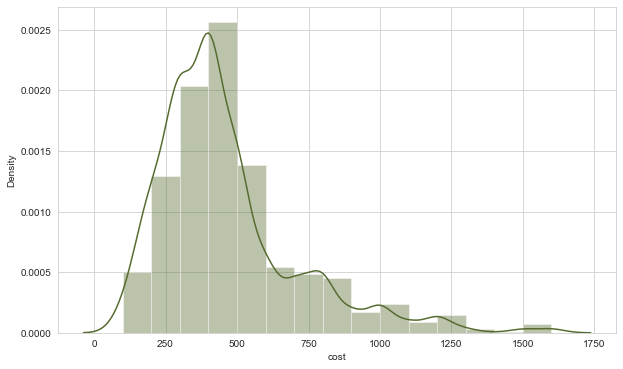

In [269]:
plt.figure(figsize=(10,6))
sns.distplot(desserts["cost"], kde=True, color="darkolivegreen", bins=15) 
plt.show()

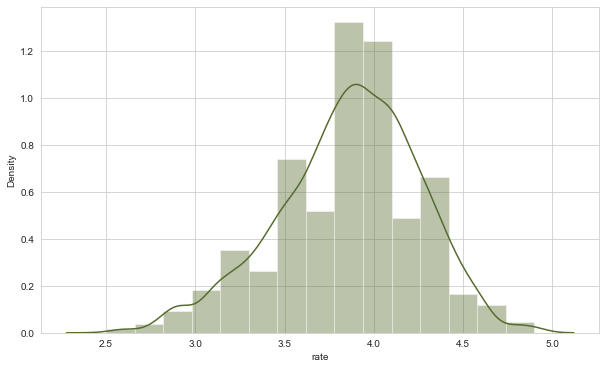

In [270]:
plt.figure(figsize=(10,6))
sns.distplot(desserts["rate"], kde=True, color="darkolivegreen", bins=15) 
plt.show()

## Location

In [271]:
bar = go.Bar(x=desserts["location"].value_counts().index, y=desserts["location"].value_counts(), 
             marker={'color': "darkolivegreen"})
layout = go.Layout(title = "Where are the dessert parlours in Bangalore?")
fig = go.Figure(data=bar, layout=layout)
py.iplot(fig, filename="basic-bar")

In [272]:
des_loc = desserts.groupby(["location"])["rate"].mean().reset_index()
des_loc

location      rate
0                     BTM  3.889063
1            Banashankari  3.736232
2       Bannerghatta Road  3.671014
3            Basavanagudi  3.869784
4               Bellandur  3.774286
5            Brigade Road  3.919553
6             Brookefield  3.787387
7           Church Street  3.926857
8         Electronic City  3.592424
9             Frazer Town  3.844167
10                    HSR  3.816463
11            Indiranagar  3.868421
12               JP Nagar  3.762428
13              Jayanagar  3.866667
14           Kalyan Nagar  3.771875
15           Kammanahalli  3.760606
16  Koramangala 4th Block  3.939759
17  Koramangala 5th Block  3.944492
18  Koramangala 6th Block  3.966250
19  Koramangala 7th Block  3.960317
20           Lavelle Road  3.954375
21                MG Road  3.933742
22           Malleshwaram  3.839604
23           Marathahalli  3.712174
24           New BEL Road  3.841304
25       Old Airport Road  3.892857
26            Rajajinagar  3.730841
27         Residency Road  3.946622
28          Sarjapur Road  3.768317
29             Whitefield  3.809286

In [273]:
des_loc.rename({"rate":"average rate"}, axis=1,inplace=True)
des_loc.head()

location  average rate
0                BTM      3.889063
1       Banashankari      3.736232
2  Bannerghatta Road      3.671014
3       Basavanagudi      3.869784
4          Bellandur      3.774286

In [274]:
des_loc["average rate"] = round(des_loc["average rate"],2)
des_loc.head()

location  average rate
0                BTM          3.89
1       Banashankari          3.74
2  Bannerghatta Road          3.67
3       Basavanagudi          3.87
4          Bellandur          3.77

In [275]:
bar = go.Bar(x=des_loc["location"], y=des_loc["average rate"], 
             marker={'color': "darkolivegreen"})
layout = go.Layout(title = "Average rating of dessert parlours per area")
fig = go.Figure(data=bar, layout=layout)
py.iplot(fig, filename="basic-bar")

In [276]:
desserts.head()

name online_order book_table  rate  votes  \
32             Sweet Truth          Yes         No   3.9     35   
52  Corner House Ice Cream           No         No   4.3    345   
59       XO Belgian Waffle          Yes         No   3.7     17   
68              Sugar Rush           No         No   3.8     39   
81           Frozen Bottle          Yes         No   4.2    146   

     type_detailed                        cuisines  cost  \
32        Delivery                Bakery, Desserts   500   
52  Dessert Parlor             Ice Cream, Desserts   400   
59  Dessert Parlor             Desserts, Beverages   400   
68          Bakery                Bakery, Desserts   300   
81   Beverage Shop  Beverages, Desserts, Ice Cream   400   

                                         reviews_list      type      location  
32  [('Rated 4.0', 'RATED\n  I had the opportunity...  Delivery  Banashankari  
52  [('Rated 3.0', "RATED\n  Always a fan of corne...  Delivery  Banashankari  
59  [('Rated 5.0', 'RATED\n  The staff is amazing....  Delivery  Banashankari  
68  [('Rated 1.0', 'RATED\n  Wanted to try cupcake...  Delivery  Banashankari  
81  [('Rated 4.0', 'RATED\n  Try this place for so...  Delivery  Banashankari

In [277]:
desserts = desserts.sort_values(by=["rate"], ascending=False)
desserts.head()

name online_order book_table  rate  votes  \
47409  Belgian Waffle Factory          Yes         No   4.9   1749   
43055  Belgian Waffle Factory          Yes         No   4.9   1750   
38457  Belgian Waffle Factory          Yes         No   4.9   1749   
47987  Belgian Waffle Factory          Yes         No   4.9   1749   
12380  Belgian Waffle Factory          Yes         No   4.9   1744   

        type_detailed  cuisines  cost  \
47409  Dessert Parlor  Desserts   400   
43055  Dessert Parlor  Desserts   400   
38457  Dessert Parlor  Desserts   400   
47987  Dessert Parlor  Desserts   400   
12380  Dessert Parlor  Desserts   400   

                                            reviews_list      type  \
47409  [('Rated 4.0', "RATED\n  Looks like there's a ...  Delivery   
43055  [('Rated 4.0', "RATED\n  Looks like there's a ...  Desserts   
38457  [('Rated 4.0', "RATED\n  Looks like there's a ...  Desserts   
47987  [('Rated 4.0', "RATED\n  Looks like there's a ...  Desserts   
12380  [('Rated 3.0', "RATED\n  Waffles are totally w...  Desserts   

             location  
47409  Residency Road  
43055         MG Road  
38457    Lavelle Road  
47987  Residency Road  
12380   Church Street

In [278]:
desserts.shape

(4512, 11)

In [279]:
topdesserts = desserts[:200]

In [280]:
topdesserts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 47409 to 7696
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           200 non-null    object 
 1   online_order   200 non-null    object 
 2   book_table     200 non-null    object 
 3   rate           200 non-null    float64
 4   votes          200 non-null    int64  
 5   type_detailed  200 non-null    object 
 6   cuisines       200 non-null    object 
 7   cost           200 non-null    int32  
 8   reviews_list   200 non-null    object 
 9   type           200 non-null    object 
 10  location       200 non-null    object 
dtypes: float64(1), int32(1), int64(1), object(8)
memory usage: 18.0+ KB


In [281]:
topdes_loc = topdesserts.groupby(["location"])["rate"].mean().reset_index()
topdes_loc = topdes_loc.sort_values(by=["rate"], ascending=False)

In [282]:
bar = go.Bar(x=topdes_loc["location"], y=topdes_loc["rate"], 
             marker={'color': "darkolivegreen"})
layout = go.Layout(title = "Average rating of the top 200 dessert parlours per area")
fig = go.Figure(data=bar, layout=layout)
py.iplot(fig, filename="basic-bar")

## Reviews

In [283]:
topdesserts["rev_clean"] = topdesserts["reviews_list"].apply(lambda x: clean_text(x))
topdesserts["rev_clean"]

47409    rated  ratedn  looks like theres a scam going ...
43055    rated  ratedn  looks like theres a scam going ...
38457    rated  ratedn  looks like theres a scam going ...
47987    rated  ratedn  looks like theres a scam going ...
12380    rated  ratedn  waffles are totally worth it re...
                               ...                        
38468    rated  ratedn  xo belgian waffle has always li...
7697     rated  ratedn  corner house is a good dessert ...
38456    rated  ratedn  this place was in my wish list ...
16949    rated  ratedn  i have been ordering from eat f...
7696     rated  ratedn  one of the best places i have b...
Name: rev_clean, Length: 200, dtype: object

In [284]:
topdesserts["rev_clean"] = topdesserts["rev_clean"].str.replace("rated ", "")
topdesserts["rev_clean"] = topdesserts["rev_clean"].str.replace("ratedn ", "")
topdesserts["rev_clean"]

47409      looks like theres a scam going on here with ...
43055      looks like theres a scam going on here with ...
38457      looks like theres a scam going on here with ...
47987      looks like theres a scam going on here with ...
12380      waffles are totally worth it really loved th...
                               ...                        
38468      xo belgian waffle has always lived up to its...
7697       corner house is a good dessert place i have ...
38456      this place was in my wish list from a long t...
16949      i have been ordering from eat fit for quite ...
7696       one of the best places i have been when it c...
Name: rev_clean, Length: 200, dtype: object

In [285]:
topdesserts["rev_clean"] = topdesserts["rev_clean"].apply(lambda x: clean_tokens(x, "english"))

In [286]:
topdesserts["rev_clean"] = topdesserts["rev_clean"].str.replace("ã", "")
topdesserts["rev_clean"] = topdesserts["rev_clean"].str.replace("â", "")

(-0.5, 399.5, 199.5, -0.5)

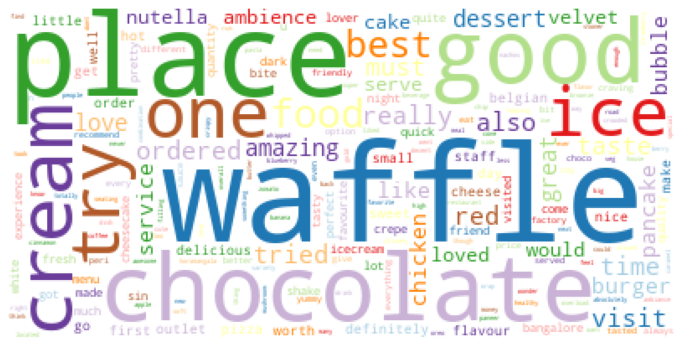

In [289]:
plt.figure(figsize=(12,9))
wordcloud = WordCloud(background_color="white",collocations=False,
                      stopwords = stopwords.words('english'),
                     colormap="Paired_r")

wordcloud.generate(' '.join(topdesserts["rev_clean"]))

plt.imshow(wordcloud)
plt.axis("off")

## Dishes

In [290]:
zomatoraw.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [294]:
desserts2 = zomatoraw.dropna(subset=["cuisines"])
desserts2

url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
1      https://www.zomato.com/bangalore/spice-elephan...   
2      https://www.zomato.com/SanchurroBangalore?cont...   
3      https://www.zomato.com/bangalore/addhuri-udupi...   
4      https://www.zomato.com/bangalore/grand-village...   
...                                                  ...   
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51713  https://www.zomato.com/bangalore/vinod-bar-and...   
51714  https://www.zomato.com/bangalore/plunge-sherat...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4      10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
...                                                  ...   
51712  Four Points by Sheraton Bengaluru, 43/3, White...   
51713  Number 10, Garudachar Palya, Mahadevapura, Whi...   
51714  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51715  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51716  ITPL Main Road, KIADB Export Promotion Industr...   

                                                    name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe          Yes   
3                                  Addhuri Udupi Bhojana           No   
4                                          Grand Village           No   
...                                                  ...          ...   
51712  Best Brews - Four Points by Sheraton Bengaluru...           No   
51713                           Vinod Bar And Restaurant           No   
51714  Plunge - Sheraton Grand Bengaluru Whitefield H...           No   
51715  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
51716                       The Nest - The Den Bengaluru           No   

      book_table    rate  votes                             phone  \
0            Yes   4.1/5    775    080 42297555\r\n+91 9743772233   
1             No   4.1/5    787                      080 41714161   
2             No   3.8/5    918                    +91 9663487993   
3             No   3.7/5     88                    +91 9620009302   
4             No   3.8/5    166  +91 8026612447\r\n+91 9901210005   
...          ...     ...    ...                               ...   
51712         No  3.6 /5     27                      080 40301477   
51713         No     NaN      0                    +91 8197675843   
51714         No     NaN      0                               NaN   
51715        Yes  4.3 /5    236                      080 49652769   
51716         No  3.4 /5     13                    +91 8071117272   

                         location            rest_type  \
0                    Banashankari        Casual Dining   
1                    Banashankari        Casual Dining   
2                    Banashankari  Cafe, Casual Dining   
3                    Banashankari          Quick Bites   
4                    Basavanagudi        Casual Dining   
...                           ...                  ...   
51712                  Whitefield                  Bar   
51713                  Whitefield                  Bar   
51714                  Whitefield                  Bar   
51715  ITPL Main Road, Whitefield                  Bar   
51716  ITPL Main Road, Whitefield   Bar, Casual Dining   

                                              dish_liked  \
0      Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1      Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Churros, Cannelloni, 

In [295]:
desserts2 = desserts2[desserts2["cuisines"].str.contains("Desserts")]

In [297]:
desserts2.shape

(5633, 17)

In [296]:
desserts2.isna().sum()

url                               0
address                           0
name                              0
online_order                      0
book_table                        0
rate                            865
votes                             0
phone                           218
location                          0
rest_type                        13
dish_liked                     2926
cuisines                          0
approx_cost(for two people)      35
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [300]:
desserts2.dropna(subset=["dish_liked"], inplace=True)

In [301]:
desserts2.isna().sum()

url                             0
address                         0
name                            0
online_order                    0
book_table                      0
rate                            2
votes                           0
phone                          84
location                        0
rest_type                       6
dish_liked                      0
cuisines                        0
approx_cost(for two people)    10
reviews_list                    0
menu_item                       0
listed_in(type)                 0
listed_in(city)                 0
dtype: int64

In [302]:
desserts2["dish_clean"] = desserts2["dish_liked"].apply(lambda x: clean_text(x))
desserts2["dish_clean"]

52       hot chocolate fudge vanilla ice cream fudge ca...
81            berryblast waffles cheesecake salted caramel
99                                     hot chocolate fudge
155      rolls ice cream roll paan ice cream coffee van...
174      pizza nachos salads peri peri fries brownie pa...
                               ...                        
51081    garlic bread peri peri chicken burgers chicken...
51313    burgers paan ice cream butter chicken pizza pe...
51315    cheesecake chocolate sundae gooey chocolate ca...
51321    waffles coffee pizza burgers hot chocolate bro...
51399    pasta sandwiches veg burger tea coffee club sa...
Name: dish_clean, Length: 2707, dtype: object

In [304]:
desserts2["dish_clean"] = desserts2["dish_liked"].apply(lambda x: clean_tokens(x, "english"))
desserts2["dish_clean"]

52       Hot Chocolate Fudge , Vanilla Ice Cream , Fudg...
81       Berryblast , Waffles , Cheesecake , Salted Car...
99                                     Hot Chocolate Fudge
155      Rolls , Ice Cream Roll , Paan Ice Cream , Coff...
174      Pizza , Nachos , Salads , Peri Peri Fries , Br...
                               ...                        
51081    Garlic Bread , Peri Peri Chicken , Burgers , C...
51313    Burgers , Paan Ice Cream , Butter Chicken Pizz...
51315    Cheesecake , Chocolate Sundae , Gooey Chocolat...
51321    Waffles , Coffee , Pizza , Burgers , Hot Choco...
51399    Pasta , Sandwiches , Veg Burger , Tea , Coffee...
Name: dish_clean, Length: 2707, dtype: object

(-0.5, 399.5, 199.5, -0.5)

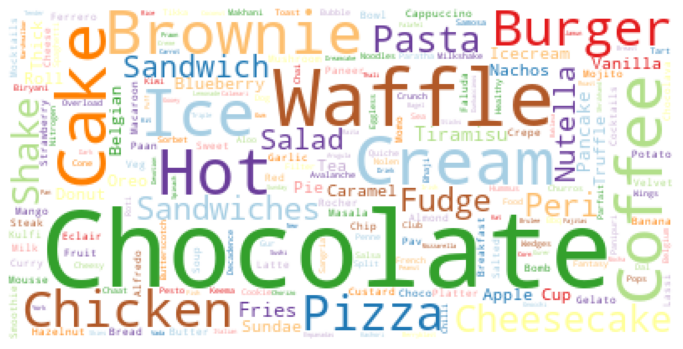

In [305]:
plt.figure(figsize=(12,9))
wordcloud = WordCloud(background_color="white",collocations=False,
                      stopwords = stopwords.words('english'),
                     colormap="Paired_r")

wordcloud.generate(' '.join(desserts2["dish_clean"]))

plt.imshow(wordcloud)
plt.axis("off")

# What makes a good restaurant?

In [306]:
zomato.head()

name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

         type_detailed                        cuisines  cost  \
0        Casual Dining  North Indian, Mughlai, Chinese   800   
1        Casual Dining     Chinese, North Indian, Thai   800   
2  Cafe, Casual Dining          Cafe, Mexican, Italian   800   
3          Quick Bites      South Indian, North Indian   300   
4        Casual Dining        North Indian, Rajasthani   600   

                                        reviews_list    type      location  
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...  Buffet  Banashankari  
1  [('Rated 4.0', 'RATED\n  Had been here for din...  Buffet  Banashankari  
2  [('Rated 3.0', "RATED\n  Ambience is not that ...  Buffet  Banashankari  
3  [('Rated 4.0', "RATED\n  Great food and proper...  Buffet  Banashankari  
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...  Buffet  Banashankari

In [307]:
zomato.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'type_detailed',
       'cuisines', 'cost', 'reviews_list', 'type', 'location'],
      dtype='object')

In [475]:
# dropping columns that are not needed for the same
rdf = zomato.drop(["name", "votes", "type_detailed", "reviews_list"],axis=1)

In [476]:
rdf.isna().sum()

online_order    0
book_table      0
rate            0
cuisines        0
cost            0
type            0
location        0
dtype: int64

In [477]:
rdf.head()

online_order book_table  rate                        cuisines  cost    type  \
0          Yes        Yes   4.1  North Indian, Mughlai, Chinese   800  Buffet   
1          Yes         No   4.1     Chinese, North Indian, Thai   800  Buffet   
2          Yes         No   3.8          Cafe, Mexican, Italian   800  Buffet   
3           No         No   3.7      South Indian, North Indian   300  Buffet   
4           No         No   3.8        North Indian, Rajasthani   600  Buffet   

       location  
0  Banashankari  
1  Banashankari  
2  Banashankari  
3  Banashankari  
4  Banashankari

## Feature engineering

### Yes/No variables

In [478]:
rdf["online_order"] = rdf["online_order"].replace({"Yes":1, "No":0})
rdf["book_table"] = rdf["book_table"].replace({"Yes":1, "No":0})

In [479]:
rdf.head()

online_order  book_table  rate                        cuisines  cost  \
0             1           1   4.1  North Indian, Mughlai, Chinese   800   
1             1           0   4.1     Chinese, North Indian, Thai   800   
2             1           0   3.8          Cafe, Mexican, Italian   800   
3             0           0   3.7      South Indian, North Indian   300   
4             0           0   3.8        North Indian, Rajasthani   600   

     type      location  
0  Buffet  Banashankari  
1  Buffet  Banashankari  
2  Buffet  Banashankari  
3  Buffet  Banashankari  
4  Buffet  Banashankari

In [480]:
rdf["online_order"].value_counts()

1    27198
0    14212
Name: online_order, dtype: int64

In [481]:
rdf["book_table"].value_counts()

0    35106
1     6304
Name: book_table, dtype: int64

### Categorical variables

In [482]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41410 entries, 0 to 51716
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   online_order  41410 non-null  int64  
 1   book_table    41410 non-null  int64  
 2   rate          41410 non-null  float64
 3   cuisines      41410 non-null  object 
 4   cost          41410 non-null  int32  
 5   type          41410 non-null  object 
 6   location      41410 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 3.4+ MB


In [483]:
rdf["cuisines"].value_counts() 

North Indian                                 2118
North Indian, Chinese                        1975
South Indian                                 1232
Cafe                                          620
Bakery, Desserts                              613
                                             ... 
North Indian, Mughlai, Lucknowi                 1
North Eastern, Street Food                      1
Continental, Thai, North Indian, Chinese        1
North Indian, Bengali, Chinese, Beverages       1
North Indian, Chinese, Arabian, Momos           1
Name: cuisines, Length: 2376, dtype: int64

In [484]:
rdf["type"].value_counts() 

Delivery              20534
Dine-out              14126
Desserts               2714
Cafes                  1511
Drinks & nightlife     1045
Buffet                  848
Pubs and bars           632
Name: type, dtype: int64

In [485]:
rdf["location"].value_counts() 

BTM                      2599
Koramangala 7th Block    2371
Koramangala 4th Block    2262
Koramangala 5th Block    2260
Koramangala 6th Block    2128
Jayanagar                1923
JP Nagar                 1644
Indiranagar              1544
Church Street            1518
MG Road                  1515
Brigade Road             1483
Lavelle Road             1451
Residency Road           1345
HSR                      1335
Marathahalli             1304
Bannerghatta Road        1217
Whitefield               1204
Old Airport Road         1178
Brookefield              1149
Basavanagudi             1072
Sarjapur Road            1027
Kammanahalli             1025
Kalyan Nagar              997
Bellandur                 965
Frazer Town               954
Malleshwaram              946
Rajajinagar               872
Electronic City           826
Banashankari              727
New BEL Road              569
Name: location, dtype: int64

In [486]:
from sklearn.preprocessing import LabelEncoder

# start the label encoder
lb_make = LabelEncoder() 

#fit to the columns 
rdf["cuisines"] = lb_make.fit_transform(rdf["cuisines"])
rdf["type"] = lb_make.fit_transform(rdf["type"])
rdf["location"] = lb_make.fit_transform(rdf["location"])


In [487]:
rdf.head()

online_order  book_table  rate  cuisines  cost  type  location
0             1           1   4.1      1901   800     0         1
1             1           0   4.1       817   800     0         1
2             1           0   3.8       654   800     0         1
3             0           0   3.7      2229   300     0         1
4             0           0   3.8      1928   600     0         1

### Scaling the numerical variable

In [488]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41410 entries, 0 to 51716
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   online_order  41410 non-null  int64  
 1   book_table    41410 non-null  int64  
 2   rate          41410 non-null  float64
 3   cuisines      41410 non-null  int32  
 4   cost          41410 non-null  int32  
 5   type          41410 non-null  int32  
 6   location      41410 non-null  int32  
dtypes: float64(1), int32(4), int64(2)
memory usage: 2.9 MB


In [489]:
cost = rdf[["cost"]]
cost

cost
0       800
1       800
2       800
3       300
4       600
...     ...
51709   800
51711   800
51712  1500
51715  2500
51716  1500

[41410 rows x 1 columns]

In [490]:
from sklearn.preprocessing import MinMaxScaler

# Initialise the Scaler 
scaler = MinMaxScaler() 
# Scale data 
dfname = cost.columns
cost_scaled = scaler.fit_transform(cost)
cost_scaled = pd.DataFrame(cost_scaled, columns= dfname)


In [491]:
cost_scaled 

cost
0      0.127517
1      0.127517
2      0.127517
3      0.043624
4      0.093960
...         ...
41405  0.127517
41406  0.127517
41407  0.244966
41408  0.412752
41409  0.244966

[41410 rows x 1 columns]

In [492]:
cost_scaled.rename(columns={"cost": "cost_scaled"}, inplace=True)
cost_scaled.head()

cost_scaled
0     0.127517
1     0.127517
2     0.127517
3     0.043624
4     0.093960

In [493]:
cost_scaled.reset_index(inplace=True, drop=True)

In [494]:
rdf.reset_index(inplace=True, drop=True)

In [495]:
rdf = pd.concat([rdf, cost_scaled],axis=1)

In [496]:
rdf

online_order  book_table  rate  cuisines  cost  type  location  \
0                 1           1   4.1      1901   800     0         1   
1                 1           0   4.1       817   800     0         1   
2                 1           0   3.8       654   800     0         1   
3                 0           0   3.7      2229   300     0         1   
4                 0           0   3.8      1928   600     0         1   
...             ...         ...   ...       ...   ...   ...       ...   
41405             0           0   3.7      1792   800     6        29   
41406             0           0   2.5       101   800     6        29   
41407             0           0   3.6       867  1500     6        29   
41408             0           1   4.3      1209  2500     6        29   
41409             0           0   3.4      1233  1500     6        29   

       cost_scaled  
0         0.127517  
1         0.127517  
2         0.127517  
3         0.043624  
4         0.093960  
...            ...  
41405     0.127517  
41406     0.127517  
41407     0.244966  
41408     0.412752  
41409     0.244966  

[41410 rows x 8 columns]

In [498]:
rdf.drop(["cost"],axis=1,inplace=True)
rdf

online_order  book_table  rate  cuisines  type  location  cost_scaled
0                 1           1   4.1      1901     0         1     0.127517
1                 1           0   4.1       817     0         1     0.127517
2                 1           0   3.8       654     0         1     0.127517
3                 0           0   3.7      2229     0         1     0.043624
4                 0           0   3.8      1928     0         1     0.093960
...             ...         ...   ...       ...   ...       ...          ...
41405             0           0   3.7      1792     6        29     0.127517
41406             0           0   2.5       101     6        29     0.127517
41407             0           0   3.6       867     6        29     0.244966
41408             0           1   4.3      1209     6        29     0.412752
41409             0           0   3.4      1233     6        29     0.244966

[41410 rows x 7 columns]

## Checking correlation

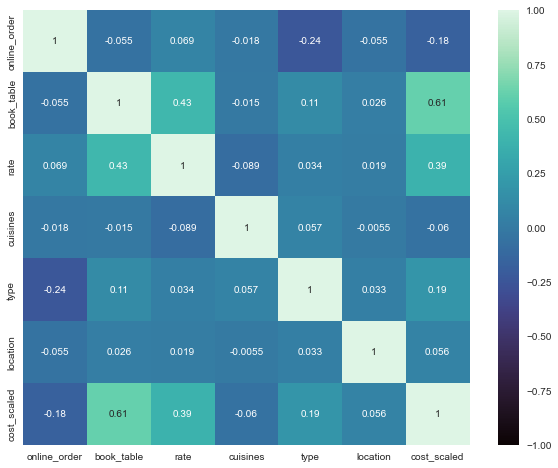

In [499]:
#correlation of numerical variables
plt.figure(figsize=(10,8))
sns.heatmap(rdf.corr(),
           xticklabels = rdf.columns.values,
           yticklabels = rdf.columns.values,
           annot = True, vmax=1, vmin=-1, center=0,  cmap = 'mako')

plt.show()


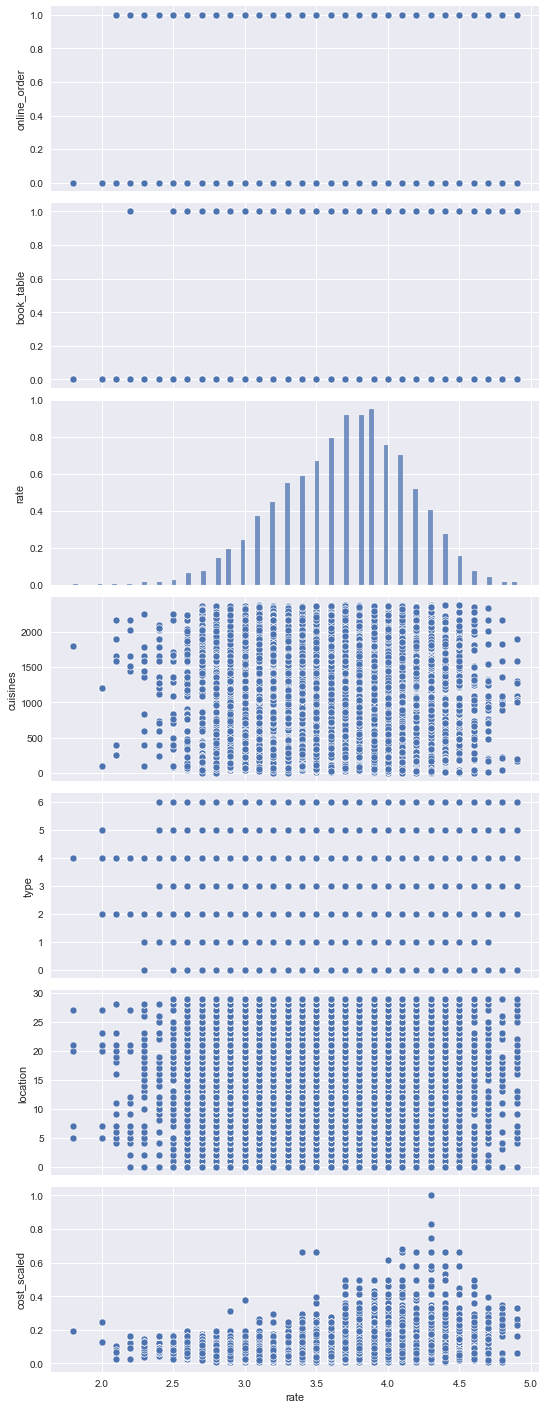

In [500]:
g = sns.pairplot(rdf, y_vars= rdf.columns.values, x_vars='rate')
g.fig.set_size_inches(10,20)

## Prepare for the model

In [501]:
# set our dependent and independet variables
X = rdf.drop(["rate"], axis=1)
y = rdf.rate

In [502]:
X

online_order  book_table  cuisines  type  location  cost_scaled
0                 1           1      1901     0         1     0.127517
1                 1           0       817     0         1     0.127517
2                 1           0       654     0         1     0.127517
3                 0           0      2229     0         1     0.043624
4                 0           0      1928     0         1     0.093960
...             ...         ...       ...   ...       ...          ...
41405             0           0      1792     6        29     0.127517
41406             0           0       101     6        29     0.127517
41407             0           0       867     6        29     0.244966
41408             0           1      1209     6        29     0.412752
41409             0           0      1233     6        29     0.244966

[41410 rows x 6 columns]

In [503]:
y

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
41405    3.7
41406    2.5
41407    3.6
41408    4.3
41409    3.4
Name: rate, Length: 41410, dtype: float64

In [504]:
#import necessary ML libraries
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [505]:
# split the data

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.33, random_state = 7)

In [506]:
Xtrain

online_order  book_table  cuisines  type  location  cost_scaled
5413              0           1       188     6         5     0.412752
19550             1           0       230     3        14     0.060403
35174             0           1      1511     6        21     0.194631
10826             1           0      1661     2         8     0.060403
31590             1           0      1042     2        22     0.043624
...             ...         ...       ...   ...       ...          ...
34140             0           0      1201     2        21     0.010067
13927             0           0      2091     1        11     0.177852
919               1           0      1590     2         2     0.093960
38467             1           0       230     3        27     0.077181
10742             1           1      1697     0         8     0.144295

[27744 rows x 6 columns]

In [507]:
ytrain

5413     4.3
19550    3.0
35174    4.3
10826    3.8
31590    4.1
        ... 
34140    3.3
13927    4.0
919      3.9
38467    4.0
10742    3.2
Name: rate, Length: 27744, dtype: float64

## Multiple Regression

### Build the model

In [508]:
mreg = LinearRegression()
mreg.fit(Xtrain, ytrain)

LinearRegression()

In [509]:
ypred = mreg.predict(Xtest)

In [510]:
ypred

array([3.54726087, 3.51122467, 3.77031495, ..., 4.08119842, 3.48567971,
       4.1762962 ])

### Evaluate the model

#### Coefficients

In [511]:
mreg.coef_

array([ 1.12318679e-01,  3.70453626e-01, -4.21777249e-05, -2.10772528e-03,
        4.16827920e-04,  1.22333547e+00])

In [512]:
mreg.intercept_

3.505657515279958

In [513]:
X.columns

Index(['online_order', 'book_table', 'cuisines', 'type', 'location',
       'cost_scaled'],
      dtype='object')

#### Visualisation of predicted values

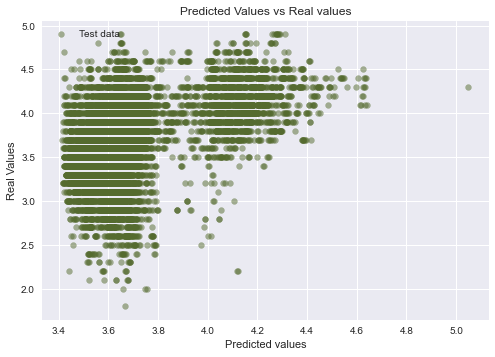

In [514]:
plt.style.use('seaborn')
plt.scatter(ypred, ytest, color = 'darkolivegreen', marker = 'o', s = 35, alpha = 0.5,
          label = 'Test data')

plt.title('Predicted Values vs Real values')
plt.xlabel('Predicted values')
plt.ylabel('Real Values')
plt.legend(loc = 'upper left')
plt.show()

#### Performance metrics

In [515]:
import sys  
sys.path.insert(0, 'fx_MLRegression')

from fx_MLRegression import *

In [516]:
Allmetrics(mreg, Xtrain, ytrain, Xtest, ytest)

MAE       MSE      RMSE        R2  CV_R2
Train  0.302755  0.151370  0.389062  0.223855  0.223
Test   0.299325  0.148174  0.384934  0.230001    NaN

In [ ]:
# makes sense because it is not a linear relationship

## SVM